In [ ]:
# v2 is oversampling and PCA 28 and without renal and without depression 

In [20]:
#from tqdm import tqdm

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt


import seaborn as sns
sns.set(font_scale=1.5)
import scikitplot as skplt
import pydotplus


from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))


from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  

import warnings
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz


plt.rc("figure", figsize=(9, 7))

warnings.simplefilter('ignore')

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500)      # to display 500 rows

import time
from datetime import datetime

from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN

In [4]:
''' # To connect to postgres database
import psycopg2

# DSN (data source name) format for database connections:  
# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]


# on your computer you are the user postgres (full administrative access)
db_user = 'postgres'
# if you need a password to access a database, put it here
db_password = ''
# on your computer, use localhost
db_host = 'localhost'
# the default port for postgres is 5432
db_port = 5432
# we want to connect to the northwind database
database =   'cms_claims' # 'cms_medicare_claims'  #

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)
'''

" # To connect to postgres database\nimport psycopg2\n\n# DSN (data source name) format for database connections:  \n# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]\n\n\n# on your computer you are the user postgres (full administrative access)\ndb_user = 'postgres'\n# if you need a password to access a database, put it here\ndb_password = ''\n# on your computer, use localhost\ndb_host = 'localhost'\n# the default port for postgres is 5432\ndb_port = 5432\n# we want to connect to the northwind database\ndatabase =   'cms_claims' # 'cms_medicare_claims'  #\n\nconn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'\nconn = psycopg2.connect(conn_str)\n"

In [5]:
'''
# Check Tables in the Database

query = """
SELECT tablename 
FROM pg_catalog.pg_tables 
WHERE schemaname='public'
"""

pd.read_sql(query, con=conn)
'''

'\n# Check Tables in the Database\n\nquery = """\nSELECT tablename \nFROM pg_catalog.pg_tables \nWHERE schemaname=\'public\'\n"""\n\npd.read_sql(query, con=conn)\n'

In [6]:
# To copy csv file from local computer to AWS
# scp -i "abhi.pem" cms.csv ubuntu@ec2-35-171-193-243.compute-1.amazonaws.com:.  (run from terminal)

In [2]:
df = pd.read_csv('cms.csv') #, header=False, inferSchema=True)
del df['Unnamed: 0']

print(df.shape)
df.head(2)

(458328, 62)


DESYNPUF_ID BENE_BIRTH_DT BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
0  00000B48BCF4AD29    1923-09-01    2100-01-01                  2   
1  0000141F2FECE9BC    1974-04-01    2100-01-01                  2   

   BENE_RACE_CD  END_STAGE_RENAL2008  END_STAGE_RENAL2009  SP_ALZHDMTA2008  \
0             5                    0                    0                1   
1             1                    0                    0                2   

   SP_ALZHDMTA2009  SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  SP_CHRNKIDN2009  \
0                1           1           1                1                2   
1                2           2           2                2                2   

   SP_CNCR2008  SP_CNCR2009  SP_COPD2008  SP_COPD2009  SP_DEPRESSN2008  \
0            1            2            2            2                1   
1            2            2            2            2                2   

   SP_DEPRESSN2009  SP_DIABETES2008  SP_DIABETES2009  SP_ISCHMCHT2008  \
0                1                1                1                1   
1                1                2                2                2   

   SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  SP_RA_OA2008  \
0                1                1                1             2   
1                2                2                2             2   

   SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  TOTAL_DIAGNOSIS2009  \
0             2                1                    9                    6   
1             2                2                    0                    1   

   TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  CHANGE_IN_PAYMEMT  \
0            93452.0             8750.0           -84702.0   
1                0.0             5308.0             5308.0   

   CHANGE_IN_DIAGNOSIS  DEAD   AGE               LOS  NUM_INPT_ADM  \
0                   -3     0  86.0  2419200000000000           3.0   
1                    1     0  35.0   172800000000000           1.0   

   TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  READMIT7  \
0          84072.0                  27.0              11.0       1.0   
1           5108.0                   9.0               1.0       0.0   

   READMIT30  READMIT60  READMIT90  NUM_OPD_VISIT  TOTAL_OPD_COST  \
0        2.0        2.0        2.0           10.0          3210.0   
1        0.0        0.0        0.0           30.0          7870.0   

   TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  TOTAL_OPD_HCPCS  \
0                 27.0              0.0             47.0   
1                 99.0              0.0             67.0   

   TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0                 210.0             10.0           200.0   
1                9930.0           1740.0         13490.0   

                                          INPT_DIAGS  \
0  3970 2800 9971 41410 V4581 2875 5121 4242 4273...   
1      5789 79029 5363 5990 3569 2449 2851 311 2869    

                                          INPT_PROCS  \
0  3615 53081 42820 78321 78321 27493521 9971 560...   
1                                          4516        

                                           OPD_DIAGS  \
0  2370         2279 V1005 4019 56210 20280 V4581...   
1  70709 4149 25000 70712 70709 70707 V4582 4321 ...   

                                           OPD_PROCS  \
0                                                ...   
1                                                ...   

                                           OPD_HCPCS  READMIT7_FLAG  \
0    81001 J3420 96372 96375 70450 99284 99212 90...              1   
1  99214  85730 84443 84100 87086 87046 84436 850...              0   

   READMIT30_FLAG  READMIT60_FLAG  READMIT90_FLAG  
0               1               1               1  
1               0               0               0

In [8]:
''' # If running query from Postgres Database
query = """

SELECT *
FROM final2008_2009
"""

df = pd.read_sql(query, conn) 
# df is patients who are in 2008 and 2009 benefciiary, unfortunately 2010 doesnt have common benefciary patients

print(df.shape)
df.head(2)
'''

' # If running query from Postgres Database\nquery = """\n\nSELECT *\nFROM final2008_2009\n"""\n\ndf = pd.read_sql(query, conn) \n# df is patients who are in 2008 and 2009 benefciiary, unfortunately 2010 doesnt have common benefciary patients\n\nprint(df.shape)\ndf.head(2)\n'

In [3]:
df.isnull().sum()

DESYNPUF_ID                  0
BENE_BIRTH_DT                0
BENE_DEATH_DT                0
BENE_SEX_IDENT_CD            0
BENE_RACE_CD                 0
END_STAGE_RENAL2008          0
END_STAGE_RENAL2009          0
SP_ALZHDMTA2008              0
SP_ALZHDMTA2009              0
SP_CHF2008                   0
SP_CHF2009                   0
SP_CHRNKIDN2008              0
SP_CHRNKIDN2009              0
SP_CNCR2008                  0
SP_CNCR2009                  0
SP_COPD2008                  0
SP_COPD2009                  0
SP_DEPRESSN2008              0
SP_DEPRESSN2009              0
SP_DIABETES2008              0
SP_DIABETES2009              0
SP_ISCHMCHT2008              0
SP_ISCHMCHT2009              0
SP_OSTEOPRS2008              0
SP_OSTEOPRS2009              0
SP_RA_OA2008                 0
SP_RA_OA2009                 0
SP_STRKETIA2008              0
TOTAL_DIAGNOSIS2008          0
TOTAL_DIAGNOSIS2009          0
TOTAL_PAYMENT2008            0
TOTAL_PAYMENT2009            0
CHANGE_I

In [10]:
''' # If running query from Postgres Database
# Replacing Nulls with 0 or spaces

query = """

SELECT 

     "DESYNPUF_ID"
    , "BENE_BIRTH_DT"
    , COALESCE("BENE_DEATH_DT", '2100-01-01') as "BENE_DEATH_DT"
    , COALESCE("BENE_SEX_IDENT_CD", 0) as "BENE_SEX_IDENT_CD"
    , COALESCE("BENE_RACE_CD", 0) as "BENE_RACE_CD"
    , cast((CASE when "END_STAGE_RENAL2008" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2008"
    , cast((CASE when "END_STAGE_RENAL2009" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2009"
    , COALESCE("SP_ALZHDMTA2008", 0) as "SP_ALZHDMTA2008"
    , COALESCE("SP_ALZHDMTA2009", 0) as "SP_ALZHDMTA2009"
    , COALESCE("SP_CHF2008", 0) as "SP_CHF2008"
    , COALESCE("SP_CHF2009", 0) as "SP_CHF2009"
    , COALESCE("SP_CHRNKIDN2008", 0) as "SP_CHRNKIDN2008"
    , COALESCE("SP_CHRNKIDN2009", 0) as "SP_CHRNKIDN2009"
    , COALESCE("SP_CNCR2008", 0) as "SP_CNCR2008"
    , COALESCE("SP_CNCR2009", 0) as "SP_CNCR2009"
    , COALESCE("SP_COPD2008", 0) as "SP_COPD2008"
    , COALESCE("SP_COPD2009", 0) as "SP_COPD2009"
    , COALESCE("SP_DEPRESSN2008", 0) as "SP_DEPRESSN2008"
    , COALESCE("SP_DEPRESSN2009", 0) as "SP_DEPRESSN2009"
    , COALESCE("SP_DIABETES2008", 0) as "SP_DIABETES2008"
    , COALESCE("SP_DIABETES2009", 0) as "SP_DIABETES2009"
    , COALESCE("SP_ISCHMCHT2008", 0) as "SP_ISCHMCHT2008"
    , COALESCE("SP_ISCHMCHT2009", 0) as "SP_ISCHMCHT2009"
    , COALESCE("SP_OSTEOPRS2008", 0) as "SP_OSTEOPRS2008"
    , COALESCE("SP_OSTEOPRS2009", 0) as "SP_OSTEOPRS2009"
    , COALESCE("SP_RA_OA2008", 0) as "SP_RA_OA2008"
    , COALESCE("SP_RA_OA2009", 0) as "SP_RA_OA2009"
    , COALESCE("SP_STRKETIA2008", 0) as "SP_STRKETIA2008"
    , COALESCE("TOTAL_DIAGNOSIS2008", 0) as "TOTAL_DIAGNOSIS2008"
    , COALESCE("TOTAL_DIAGNOSIS2009", 0) as "TOTAL_DIAGNOSIS2009"
    , COALESCE("TOTAL_PAYMENT2008", 0) as "TOTAL_PAYMENT2008"
    , COALESCE("TOTAL_PAYMENT2009", 0) as "TOTAL_PAYMENT2009"
    , COALESCE("CHANGE_IN_PAYMEMT", 0) as "CHANGE_IN_PAYMEMT"
    , COALESCE("CHANGE_IN_DIANOSIS", 0) as "CHANGE_IN_DIAGNOSIS"
    , COALESCE("DEAD", 0) as "DEAD"
    , COALESCE("AGE", 0) as "AGE"
    , COALESCE("LOS", 0) as "LOS"
    , COALESCE("NUM_INPT_ADM", 0) as "NUM_INPT_ADM"
    , COALESCE("TOTAL_INPT_COST", 0) as "TOTAL_INPT_COST"
    , COALESCE("TOTAL_INPT_DIAGNOSIS", 0) as "TOTAL_INPT_DIAGNOSIS"
    , COALESCE("TOTAL_INPT_PROCS", 0) as "TOTAL_INPT_PROCS"
    , COALESCE("READMIT7", 0) as "READMIT7" 
    , COALESCE("READMIT30", 0) as "READMIT30"
    , COALESCE("READMIT60", 0) as "READMIT60"
    , COALESCE("READMIT90", 0) as "READMIT90"
    , COALESCE("NUM_OPD_VISIT", 0) as "NUM_OPD_VISIT"
    , COALESCE("TOTAL_OPD_COST", 0) as "TOTAL_OPD_COST"
    , COALESCE("TOTAL_OPD_DIAGNOSIS", 0) as "TOTAL_OPD_DIAGNOSIS"
    , COALESCE("TOTAL_OPD_PROCS", 0) as "TOTAL_OPD_PROCS"
    , COALESCE("TOTAL_OPD_HCPCS", 0) as "TOTAL_OPD_HCPCS"
    , COALESCE("TOTAL_QTY_DSPNSD_NUM", 0) as "TOTAL_QTY_DSPNSD_NUM"
    , COALESCE("PTNT_PAY_RX_AMT", 0) as "PTNT_PAY_RX_AMT"
    , COALESCE("TOT_RX_CST_AMT", 0) as "TOT_RX_CST_AMT"
    , COALESCE("INPT_DIAGS", '') as "INPT_DIAGS"
    , COALESCE("INPT_PROCS", '') as "INPT_PROCS"
    , COALESCE("OPD_DIAGS", '') as "OPD_DIAGS"
    , COALESCE("OPD_PROCS", '') as "OPD_PROCS"
    , COALESCE("OPD_HCPCS", '') as "OPD_HCPCS"
    , CASE when "READMIT7" = 0.0 then 0 else 1 END as "READMIT7_FLAG"  
    , CASE when "READMIT30" = 0.0 then 0 else 1 END as "READMIT30_FLAG" 
    , CASE when "READMIT60" = 0.0 then 0 else 1 END as "READMIT60_FLAG" 
    , CASE when "READMIT90" = 0.0 then 0 else 1 END as "READMIT90_FLAG" 

FROM final2008_2009
"""

df = pd.read_sql(query, conn) 
# df is patients who are in 2008 and 2009 benefciiary, unfortunately 2010 doesnt have common benefciary patients

print(df.shape)
df.head(2)

''' 

' # If running query from Postgres Database\n# Replacing Nulls with 0 or spaces\n\nquery = """\n\nSELECT \n\n     "DESYNPUF_ID"\n    , "BENE_BIRTH_DT"\n    , COALESCE("BENE_DEATH_DT", \'2100-01-01\') as "BENE_DEATH_DT"\n    , COALESCE("BENE_SEX_IDENT_CD", 0) as "BENE_SEX_IDENT_CD"\n    , COALESCE("BENE_RACE_CD", 0) as "BENE_RACE_CD"\n    , cast((CASE when "END_STAGE_RENAL2008" like \'Y\' then \'1\' else \'0\' END) as int) as "END_STAGE_RENAL2008"\n    , cast((CASE when "END_STAGE_RENAL2009" like \'Y\' then \'1\' else \'0\' END) as int) as "END_STAGE_RENAL2009"\n    , COALESCE("SP_ALZHDMTA2008", 0) as "SP_ALZHDMTA2008"\n    , COALESCE("SP_ALZHDMTA2009", 0) as "SP_ALZHDMTA2009"\n    , COALESCE("SP_CHF2008", 0) as "SP_CHF2008"\n    , COALESCE("SP_CHF2009", 0) as "SP_CHF2009"\n    , COALESCE("SP_CHRNKIDN2008", 0) as "SP_CHRNKIDN2008"\n    , COALESCE("SP_CHRNKIDN2009", 0) as "SP_CHRNKIDN2009"\n    , COALESCE("SP_CNCR2008", 0) as "SP_CNCR2008"\n    , COALESCE("SP_CNCR2009", 0) as "SP_CNCR200

In [4]:
# Some columns still have None, replacing with space

df.INPT_DIAGS.fillna('', inplace=True)
df.INPT_PROCS.fillna('', inplace=True)
df.OPD_DIAGS.fillna('', inplace=True)
df.OPD_PROCS.fillna('', inplace=True)
df.OPD_HCPCS.fillna('', inplace=True)

#df.INPT_DIAGS.values

In [5]:
# Checking for nulls again

df.isnull().sum()

DESYNPUF_ID             0
BENE_BIRTH_DT           0
BENE_DEATH_DT           0
BENE_SEX_IDENT_CD       0
BENE_RACE_CD            0
END_STAGE_RENAL2008     0
END_STAGE_RENAL2009     0
SP_ALZHDMTA2008         0
SP_ALZHDMTA2009         0
SP_CHF2008              0
SP_CHF2009              0
SP_CHRNKIDN2008         0
SP_CHRNKIDN2009         0
SP_CNCR2008             0
SP_CNCR2009             0
SP_COPD2008             0
SP_COPD2009             0
SP_DEPRESSN2008         0
SP_DEPRESSN2009         0
SP_DIABETES2008         0
SP_DIABETES2009         0
SP_ISCHMCHT2008         0
SP_ISCHMCHT2009         0
SP_OSTEOPRS2008         0
SP_OSTEOPRS2009         0
SP_RA_OA2008            0
SP_RA_OA2009            0
SP_STRKETIA2008         0
TOTAL_DIAGNOSIS2008     0
TOTAL_DIAGNOSIS2009     0
TOTAL_PAYMENT2008       0
TOTAL_PAYMENT2009       0
CHANGE_IN_PAYMEMT       0
CHANGE_IN_DIAGNOSIS     0
DEAD                    0
AGE                     0
LOS                     0
NUM_INPT_ADM            0
TOTAL_INPT_C

In [13]:
# write to csv (to be exported to AWS if and when required)

# df.to_csv(r'/Users/abhi/Documents/Abhi/General Assembly/Immersive course/Course/DSI12-lessons/projects/cms.csv', header=True) 

In [6]:
# Checking data types and columns

#df.dtypes
df.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'DEAD', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',

### Looking for corelation between the variables

In [15]:
corr = df.corr()
corr

BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  \
BENE_SEX_IDENT_CD              1.000000     -0.002014             0.010620   
BENE_RACE_CD                  -0.002014      1.000000            -0.010043   
END_STAGE_RENAL2008            0.010620     -0.010043             1.000000   
END_STAGE_RENAL2009            0.012348     -0.012050             0.223199   
SP_ALZHDMTA2008               -0.028000      0.018841            -0.181248   
SP_ALZHDMTA2009               -0.029205      0.021716            -0.157829   
SP_CHF2008                    -0.029833      0.028560            -0.248140   
SP_CHF2009                    -0.030813      0.033484            -0.213401   
SP_CHRNKIDN2008               -0.019849      0.021986            -0.444004   
SP_CHRNKIDN2009               -0.022963      0.020971            -0.255058   
SP_CNCR2008                   -0.003268      0.022071            -0.097296   
SP_CNCR2009                   -0.001630      0.025387            -0.074324   
SP_COPD2008                   -0.019019      0.017502            -0.213796   
SP_COPD2009                   -0.022936      0.019224            -0.179359   
SP_DEPRESSN2008               -0.034689      0.013334            -0.165446   
SP_DEPRESSN2009               -0.034278      0.018506            -0.146703   
SP_DIABETES2008               -0.041289      0.034334            -0.239939   
SP_DIABETES2009               -0.039473      0.036305            -0.213996   
SP_ISCHMCHT2008               -0.034930      0.043116            -0.223525   
SP_ISCHMCHT2009               -0.032901      0.044464            -0.193890   
SP_OSTEOPRS2008               -0.031519      0.023292            -0.114852   
SP_OSTEOPRS2009               -0.029518      0.026563            -0.092001   
SP_RA_OA2008                  -0.027536      0.025768            -0.139138   
SP_RA_OA2009                  -0.024659      0.026291            -0.117129   
SP_STRKETIA2008               -0.008198      0.009768            -0.153895   
TOTAL_DIAGNOSIS2008            0.046593     -0.042165             0.352498   
TOTAL_DIAGNOSIS2009            0.046907     -0.047135             0.289345   
TOTAL_PAYMENT2008              0.012576     -0.022515             0.344924   
TOTAL_PAYMENT2009              0.019875     -0.023577             0.259135   
CHANGE_IN_PAYMEMT              0.004363      0.002065            -0.115592   
CHANGE_IN_DIAGNOSIS            0.002254     -0.008939            -0.079428   
DEAD                          -0.001399     -0.001170             0.001674   
AGE                            0.108223     -0.076374             0.027200   
LOS                           -0.001133     -0.000440            -0.001738   
NUM_INPT_ADM                   0.000725     -0.000242            -0.000299   
TOTAL_INPT_COST                0.000028      0.000385             0.001185   
TOTAL_INPT_DIAGNOSIS           0.000635     -0.000435            -0.000333   
TOTAL_INPT_PROCS               0.000725     -0.001103             0.000067   
READMIT7                       0.000334     -0.000129             0.000473   
READMIT30                      0.000929      0.000252             0.000675   
READMIT60                      0.001020     -0.000014             0.001184   
READMIT90                      0.001244     -0.000274             0.001143   
NUM_OPD_VISIT                 -0.001004     -0.001168             0.000940   
TOTAL_OPD_COST                -0.001002      0.000448             0.001515   
TOTAL_OPD_DIAGNOSIS           -0.001108     -0.000716             0.001129   
TOTAL_OPD_PROCS                0.001997      0.001562            -0.002804   
TOTAL_OPD_HCPCS               -0.000744     -0.000585             0.000962   
TOTAL_QTY_DSPNSD_NUM          -0.001632     -0.002232            -0.000249   
PTNT_PAY_RX_AMT               -0.001358     -0.002353            -0.000565   
TOT_RX_CST_AMT                -0.002229     -0.002124            -0.000759   
READMIT7_FLAG                  0.000830     

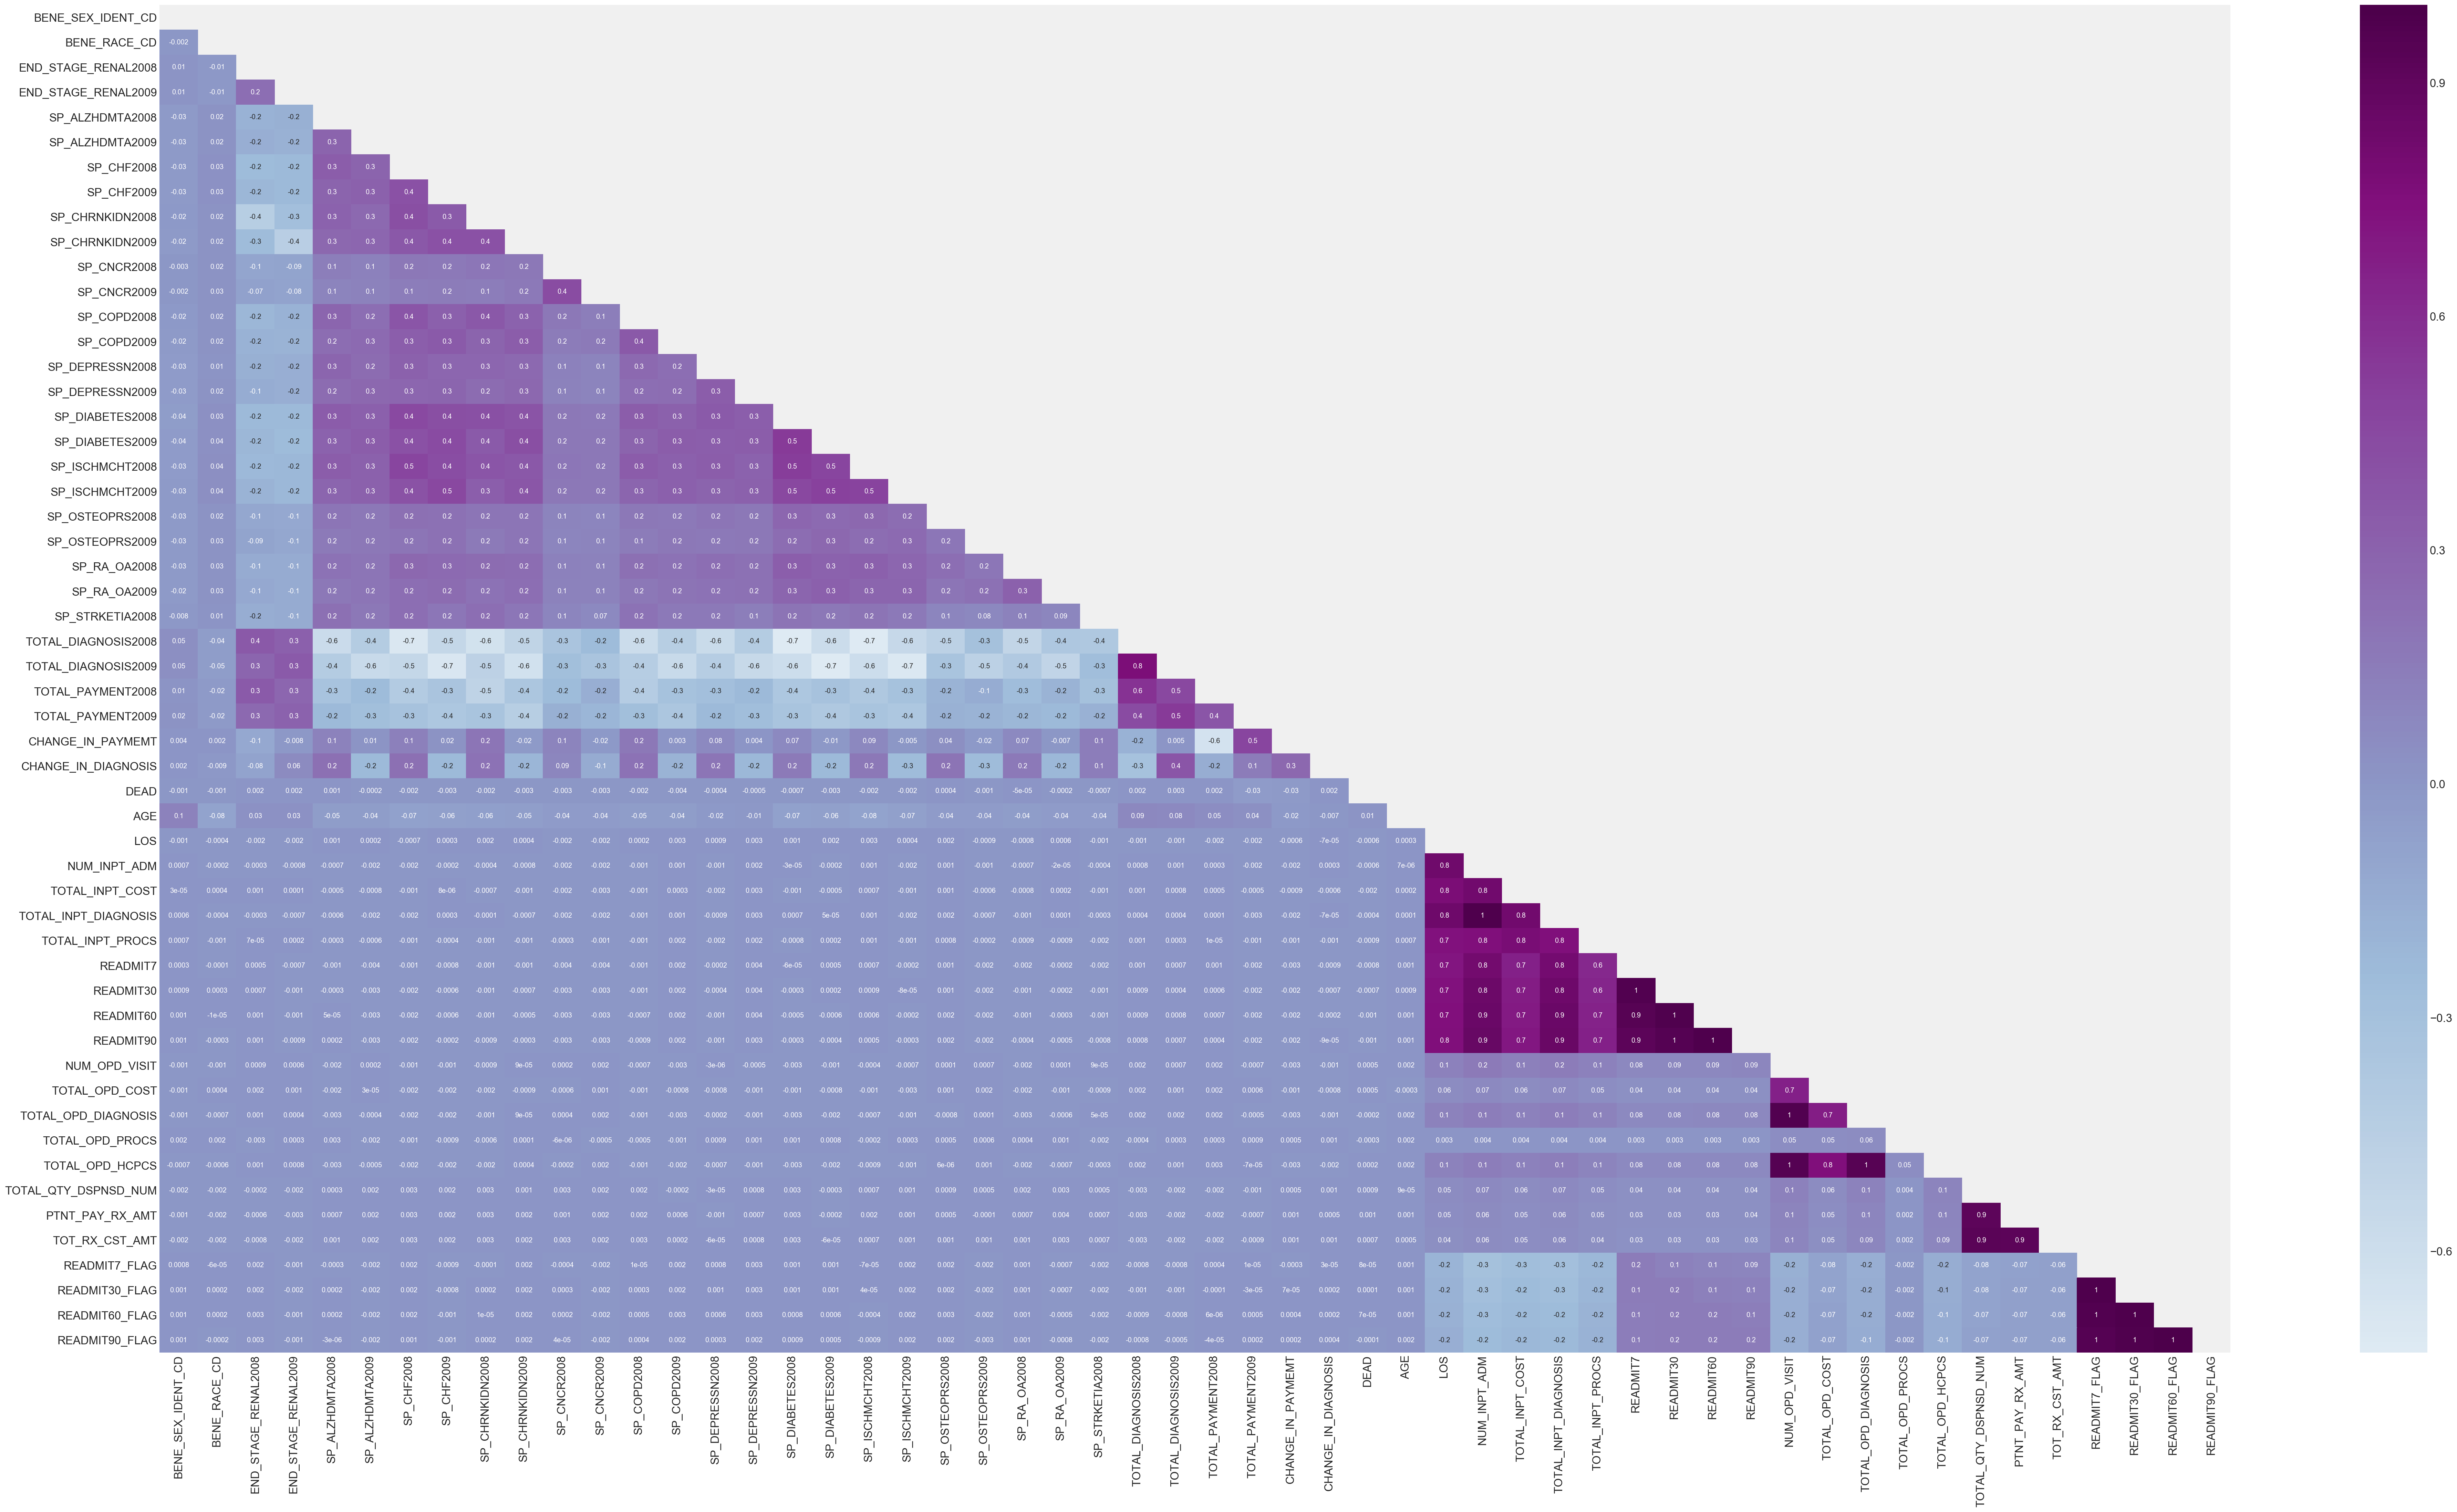

In [16]:
fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',    

#### Correlation of predcitor variables against the target variable

In [17]:
corr1 = df.corr()['READMIT30_FLAG'][:] 
corr_target = corr1.sort_values(ascending=False)
corr_target_df=pd.DataFrame(corr_target)
corr_target_df

READMIT30_FLAG
READMIT30_FLAG              1.000000
READMIT60_FLAG              0.985010
READMIT7_FLAG               0.981592
READMIT90_FLAG              0.974021
READMIT30                   0.154081
READMIT7                    0.149538
READMIT60                   0.134177
READMIT90                   0.120721
SP_DEPRESSN2009             0.003028
SP_OSTEOPRS2008             0.002317
SP_COPD2009                 0.002282
SP_ISCHMCHT2009             0.002138
END_STAGE_RENAL2008         0.001944
SP_CHRNKIDN2009             0.001932
SP_CHF2008                  0.001542
BENE_SEX_IDENT_CD           0.001327
SP_RA_OA2008                0.001313
AGE                         0.001303
SP_DIABETES2008             0.001118
SP_DIABETES2009             0.001118
SP_DEPRESSN2008             0.001037
SP_COPD2008                 0.000337
SP_CNCR2008                 0.000252
SP_CHRNKIDN2008             0.000242
SP_ALZHDMTA2008             0.000195
CHANGE_IN_DIAGNOSIS         0.000186
BENE_RACE_CD                0.000165
DEAD                        0.000146
CHANGE_IN_PAYMEMT           0.000074
SP_ISCHMCHT2008             0.000044
TOTAL_PAYMENT2009          -0.000025
TOTAL_PAYMENT2008          -0.000099
SP_RA_OA2009               -0.000669
SP_CHF2009                 -0.000848
TOTAL_DIAGNOSIS2009        -0.001049
TOTAL_DIAGNOSIS2008        -0.001207
SP_ALZHDMTA2009            -0.001622
END_STAGE_RENAL2009        -0.001765
SP_CNCR2009                -0.001948
SP_STRKETIA2008            -0.002029
SP_OSTEOPRS2009            -0.002032
TOTAL_OPD_PROCS            -0.002159
TOT_RX_CST_AMT             -0.062546
PTNT_PAY_RX_AMT            -0.066852
TOTAL_OPD_COST             -0.074570
TOTAL_QTY_DSPNSD_NUM       -0.075230
TOTAL_OPD_HCPCS            -0.149133
TOTAL_OPD_DIAGNOSIS        -0.152907
NUM_OPD_VISIT              -0.162110
LOS                        -0.181325
TOTAL_INPT_PROCS           -0.204151
TOTAL_INPT_COST            -0.245508
TOTAL_INPT_DIAGNOSIS       -0.264068
NUM_INPT_ADM               -0.279126

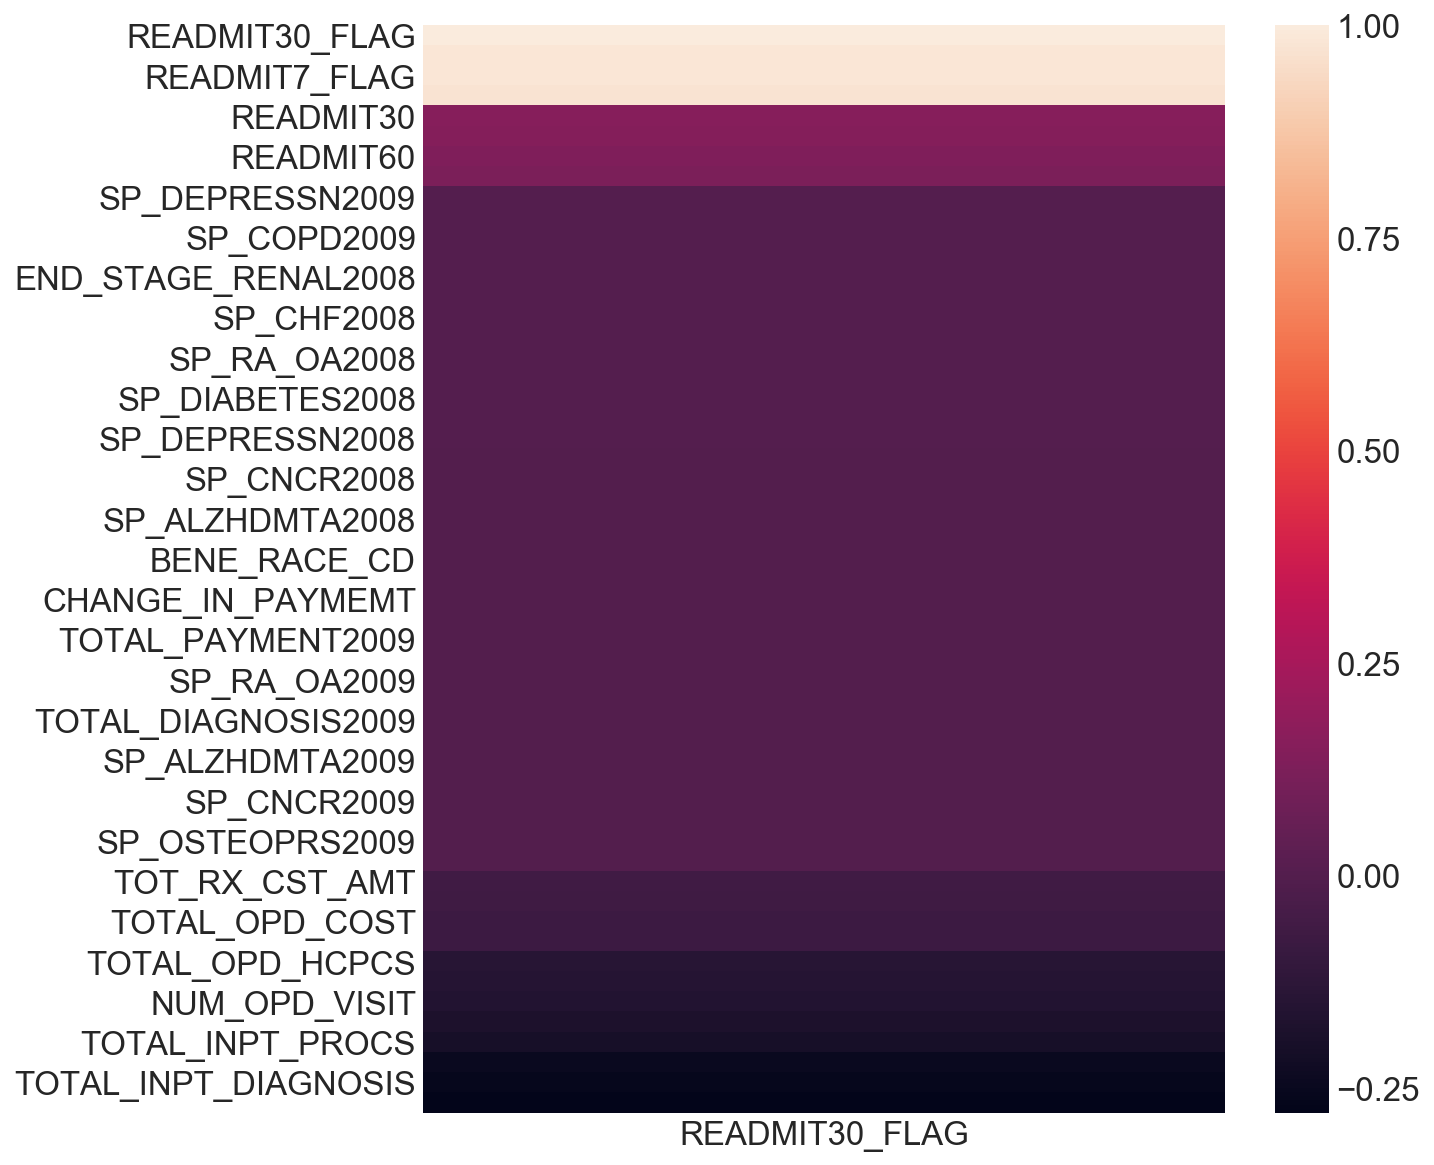

In [18]:
fig, ax = plt.subplots(figsize=(8,10 ))
sns.heatmap(corr_target_df);

### Feature selection (excuding string summation of ICDs features and features with high correlation with the target variable, and also features showing colinearity)

In [7]:
df_selected = df[['BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', # 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', #'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',
       'PTNT_PAY_RX_AMT', 'TOT_RX_CST_AMT', 'READMIT30_FLAG']].copy()   

print(df_selected.shape)
df_selected.head(2)  

(458328, 42)


BENE_SEX_IDENT_CD  BENE_RACE_CD  SP_ALZHDMTA2008  SP_ALZHDMTA2009  \
0                  2             5                1                1   
1                  2             1                2                2   

   SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  SP_CHRNKIDN2009  SP_CNCR2008  \
0           1           1                1                2            1   
1           2           2                2                2            2   

   SP_CNCR2009  SP_COPD2008  SP_COPD2009  SP_DIABETES2008  SP_DIABETES2009  \
0            2            2            2                1                1   
1            2            2            2                2                2   

   SP_ISCHMCHT2008  SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  \
0                1                1                1                1   
1                2                2                2                2   

   SP_RA_OA2008  SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  \
0             2             2                1                    9   
1             2             2                2                    0   

   TOTAL_DIAGNOSIS2009  TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  \
0                    6            93452.0             8750.0   
1                    1                0.0             5308.0   

   CHANGE_IN_PAYMEMT  CHANGE_IN_DIAGNOSIS   AGE               LOS  \
0           -84702.0                   -3  86.0  2419200000000000   
1             5308.0                    1  35.0   172800000000000   

   NUM_INPT_ADM  TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  \
0           3.0          84072.0                  27.0              11.0   
1           1.0           5108.0                   9.0               1.0   

   NUM_OPD_VISIT  TOTAL_OPD_COST  TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  \
0           10.0          3210.0                 27.0              0.0   
1           30.0          7870.0                 99.0              0.0   

   TOTAL_OPD_HCPCS  TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0             47.0                 210.0             10.0           200.0   
1             67.0                9930.0           1740.0         13490.0   

   READMIT30_FLAG  
0               1  
1               0

#### Looking for correlation between selected features and target

In [8]:
corr_target = df_selected.corr()['READMIT30_FLAG'][:] 
corr_readmit30 = corr_target.sort_values(ascending=False)
corr_readmit30_df=pd.DataFrame(corr_readmit30)
corr_readmit30_df

READMIT30_FLAG
READMIT30_FLAG              1.000000
SP_OSTEOPRS2008             0.002317
SP_COPD2009                 0.002282
SP_ISCHMCHT2009             0.002138
SP_CHRNKIDN2009             0.001932
SP_CHF2008                  0.001542
BENE_SEX_IDENT_CD           0.001327
SP_RA_OA2008                0.001313
AGE                         0.001303
SP_DIABETES2008             0.001118
SP_DIABETES2009             0.001118
SP_COPD2008                 0.000337
SP_CNCR2008                 0.000252
SP_CHRNKIDN2008             0.000242
SP_ALZHDMTA2008             0.000195
CHANGE_IN_DIAGNOSIS         0.000186
BENE_RACE_CD                0.000165
CHANGE_IN_PAYMEMT           0.000074
SP_ISCHMCHT2008             0.000044
TOTAL_PAYMENT2009          -0.000025
TOTAL_PAYMENT2008          -0.000099
SP_RA_OA2009               -0.000669
SP_CHF2009                 -0.000848
TOTAL_DIAGNOSIS2009        -0.001049
TOTAL_DIAGNOSIS2008        -0.001207
SP_ALZHDMTA2009            -0.001622
SP_CNCR2009                -0.001948
SP_STRKETIA2008            -0.002029
SP_OSTEOPRS2009            -0.002032
TOTAL_OPD_PROCS            -0.002159
TOT_RX_CST_AMT             -0.062546
PTNT_PAY_RX_AMT            -0.066852
TOTAL_OPD_COST             -0.074570
TOTAL_QTY_DSPNSD_NUM       -0.075230
TOTAL_OPD_HCPCS            -0.149133
TOTAL_OPD_DIAGNOSIS        -0.152907
NUM_OPD_VISIT              -0.162110
LOS                        -0.181325
TOTAL_INPT_PROCS           -0.204151
TOTAL_INPT_COST            -0.245508
TOTAL_INPT_DIAGNOSIS       -0.264068
NUM_INPT_ADM               -0.279126

In [21]:
#fig, ax = plt.subplots(figsize=(8,10 ))
#sns.heatmap(corr_readmit30_df);

### Evaluating imprortant features based on Chi-square

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = df_selected.iloc[:,0:19]  #independent columns
target = df_selected.iloc[:,-1]    #target column readmit flag

#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

             Features     Score
15    SP_ISCHMCHT2009  0.343195
16    SP_OSTEOPRS2008  0.193839
11        SP_COPD2009  0.171851
17    SP_OSTEOPRS2009  0.162473
7     SP_CHRNKIDN2009  0.156765
4          SP_CHF2008  0.129336
0   BENE_SEX_IDENT_CD  0.127988
3     SP_ALZHDMTA2009  0.120989
13    SP_DIABETES2009  0.087880
12    SP_DIABETES2008  0.083324
9         SP_CNCR2009  0.067494
18       SP_RA_OA2008  0.055688
5          SP_CHF2009  0.044716
1        BENE_RACE_CD  0.005539
10        SP_COPD2008  0.003276


### Visualizing the spread of features grouped by the Target Variable (READMIT30_FLAG)

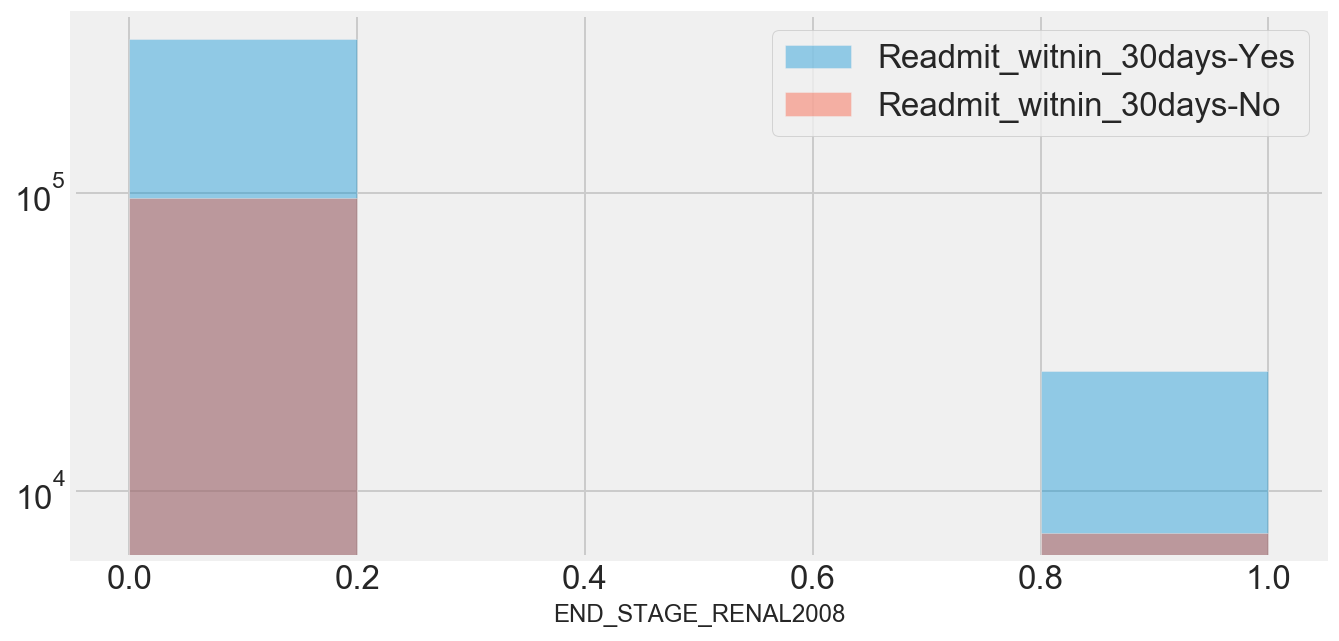

In [23]:
yes = df[df['READMIT30_FLAG'] == 1]['END_STAGE_RENAL2008']
no = df[df['READMIT30_FLAG'] == 0]['END_STAGE_RENAL2008']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=5, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=5, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

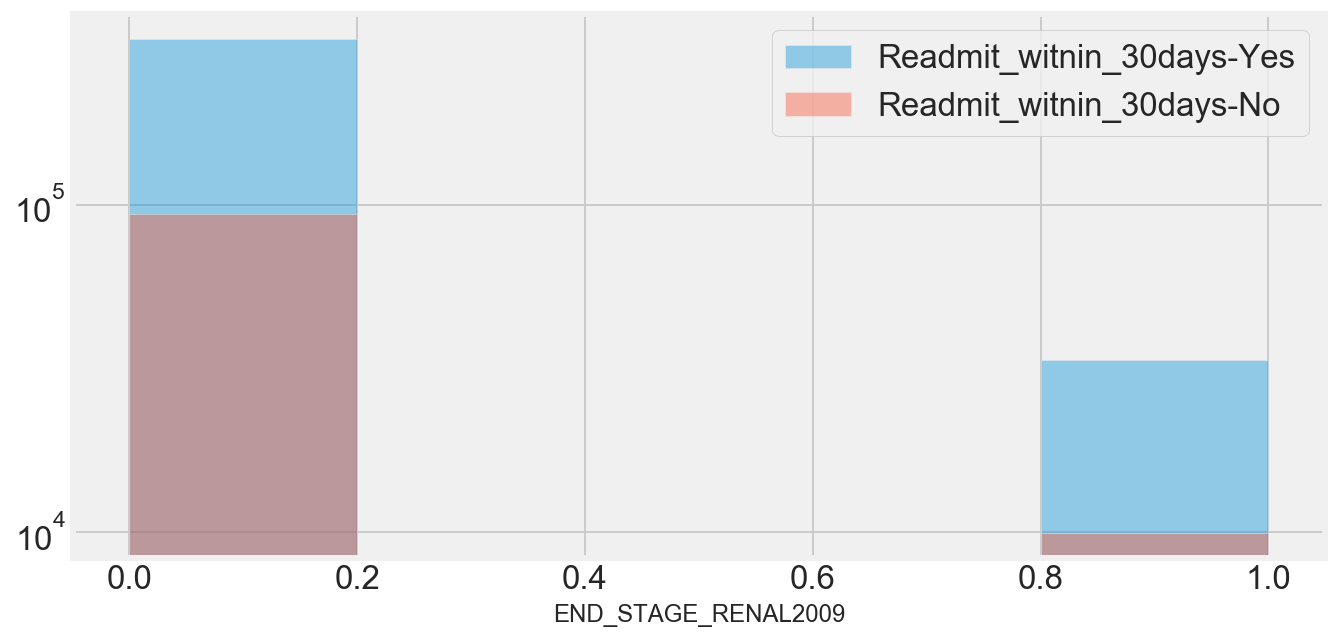

In [24]:
yes = df[df['READMIT30_FLAG'] == 1]['END_STAGE_RENAL2009']
no = df[df['READMIT30_FLAG'] == 0]['END_STAGE_RENAL2009']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=5, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=5, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

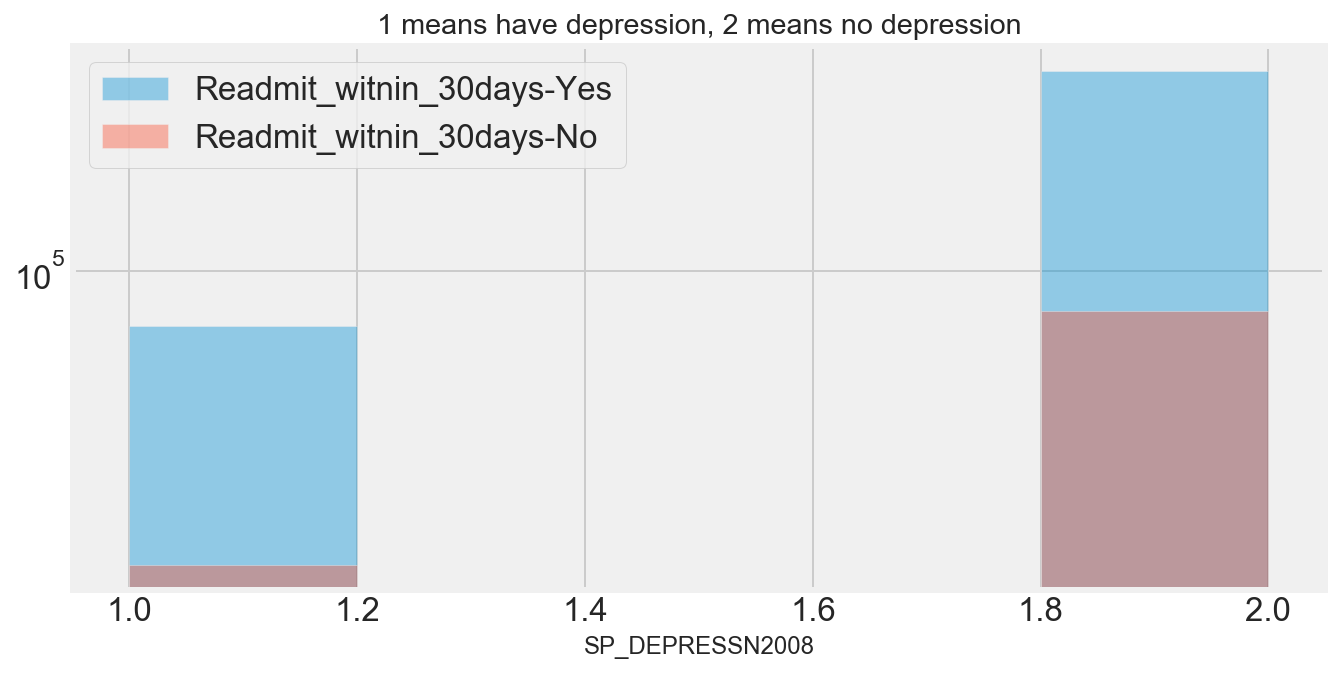

In [8]:
yes = df[df['READMIT30_FLAG'] == 1]['SP_DEPRESSN2008']
no = df[df['READMIT30_FLAG'] == 0]['SP_DEPRESSN2008']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=5, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=5, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.title('1 means have depression, 2 means no depression')
plt.yscale('log')
plt.show()

# 1 means - depression, 2 means no depression

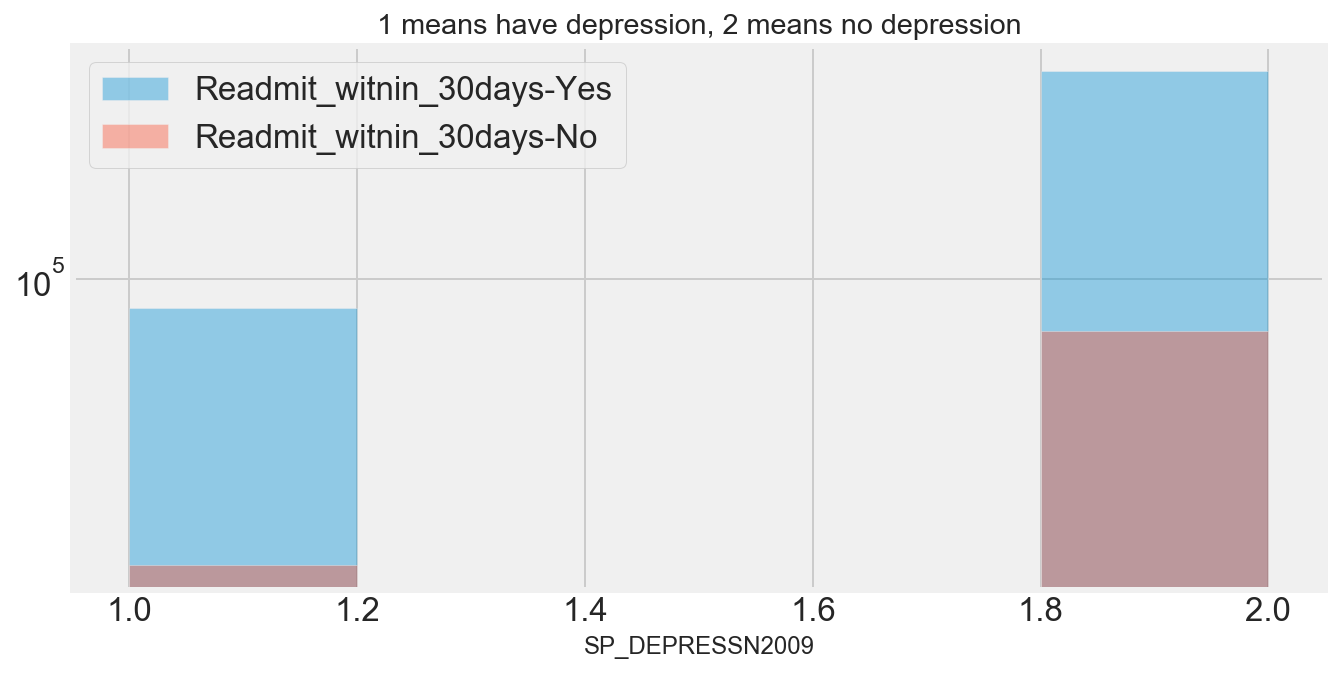

In [9]:
yes = df[df['READMIT30_FLAG'] == 1]['SP_DEPRESSN2009']
no = df[df['READMIT30_FLAG'] == 0]['SP_DEPRESSN2009']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=5, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=5, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.title('1 means have depression, 2 means no depression')
plt.yscale('log')
plt.show()

# 1 means - depression, 2 means no depression

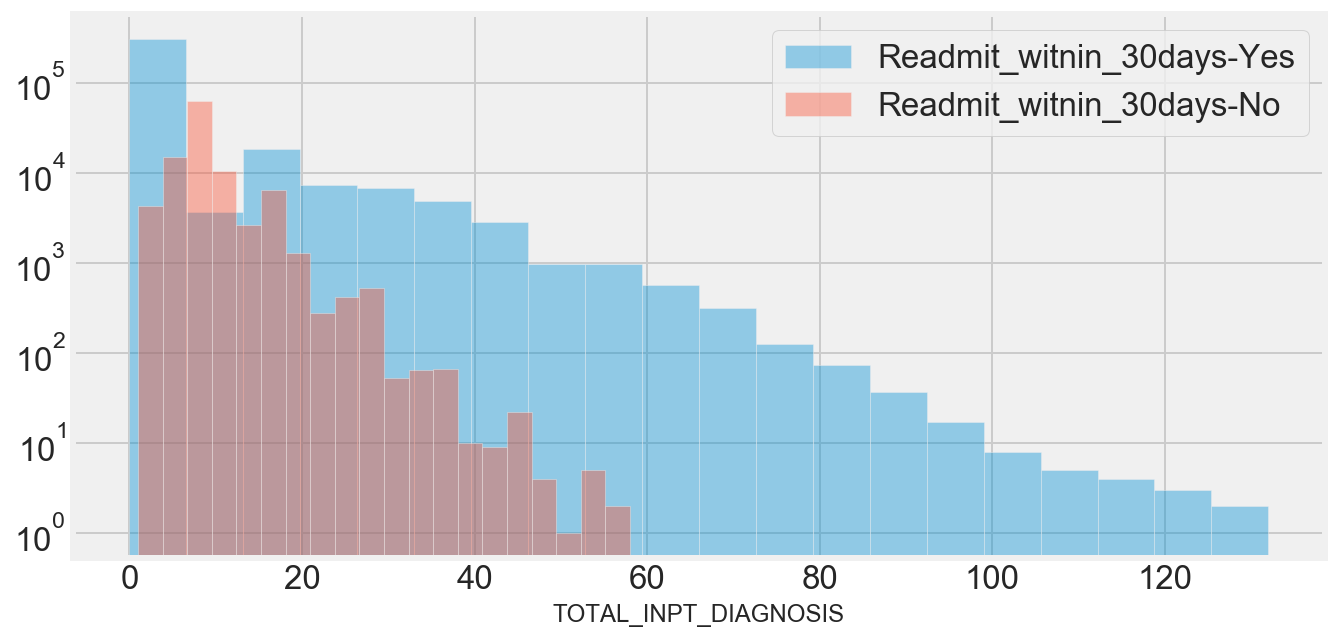

In [10]:
#df_selected.groupby('READMIT30_FLAG').hist('TOTAL_INPT_DIAGNOSIS') 

#plt.hist(df_selected.TOTAL_INPT_DIAGNOSIS, bins=50);
#plt.yscale('log')
#plt.show()

yes = df[df['READMIT30_FLAG'] == 1]['TOTAL_INPT_DIAGNOSIS']
no = df[df['READMIT30_FLAG'] == 0]['TOTAL_INPT_DIAGNOSIS']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

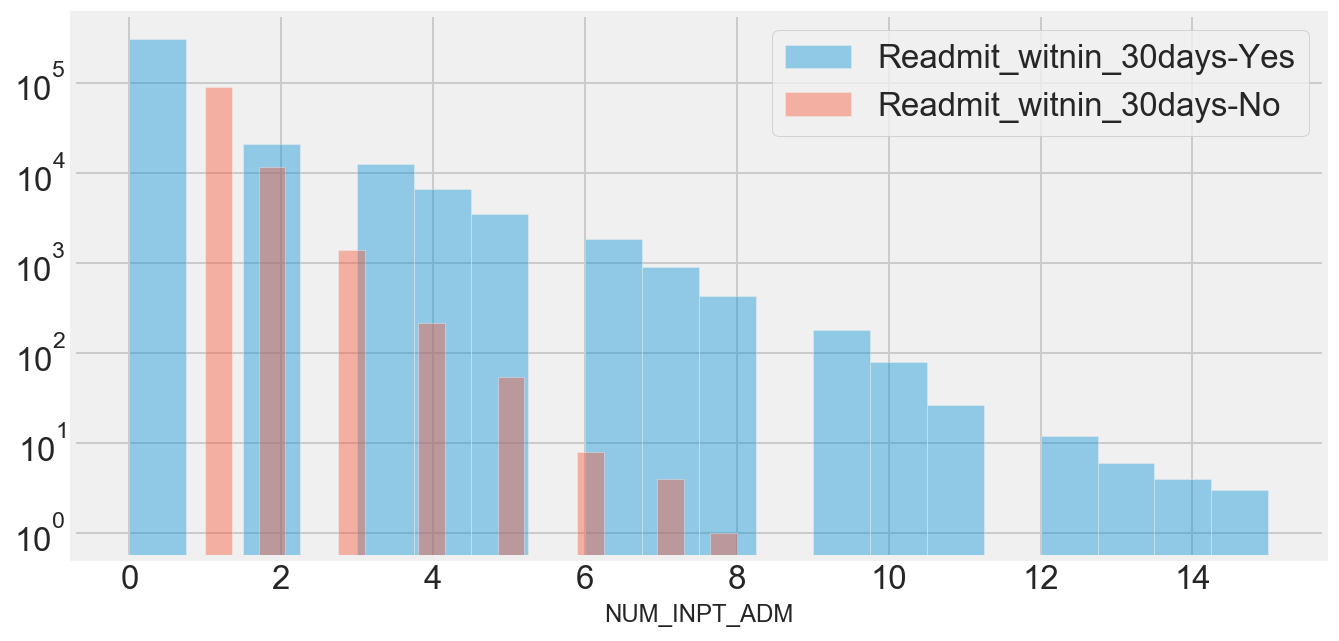

In [27]:
yes = df[df['READMIT30_FLAG'] == 1]['NUM_INPT_ADM']
no = df[df['READMIT30_FLAG'] == 0]['NUM_INPT_ADM']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

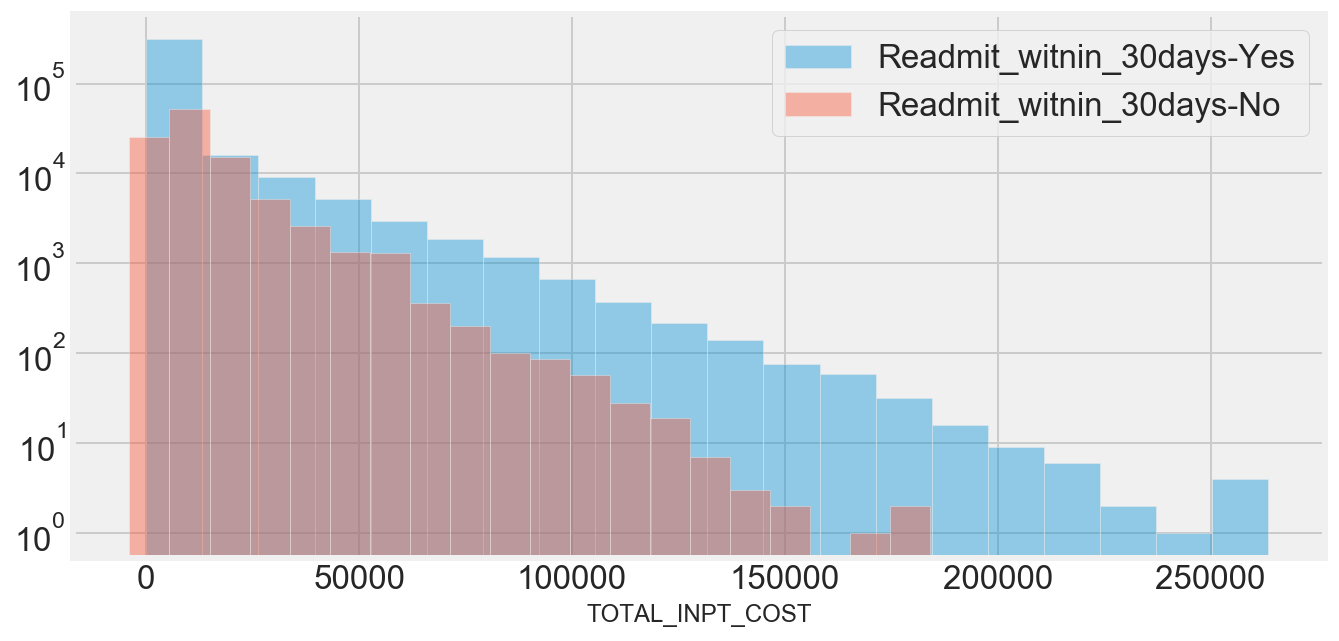

In [28]:
yes = df[df['READMIT30_FLAG'] == 1]['TOTAL_INPT_COST']
no = df[df['READMIT30_FLAG'] == 0]['TOTAL_INPT_COST']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

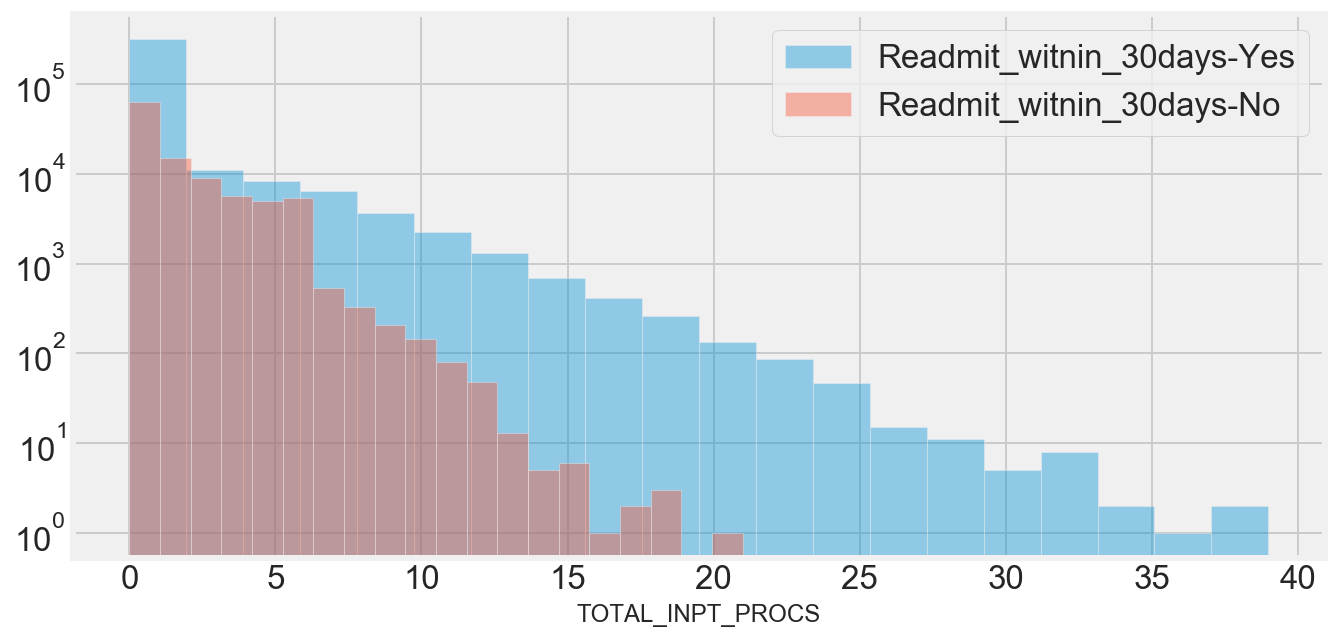

In [29]:
yes = df[df['READMIT30_FLAG'] == 1]['TOTAL_INPT_PROCS']
no = df[df['READMIT30_FLAG'] == 0]['TOTAL_INPT_PROCS']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

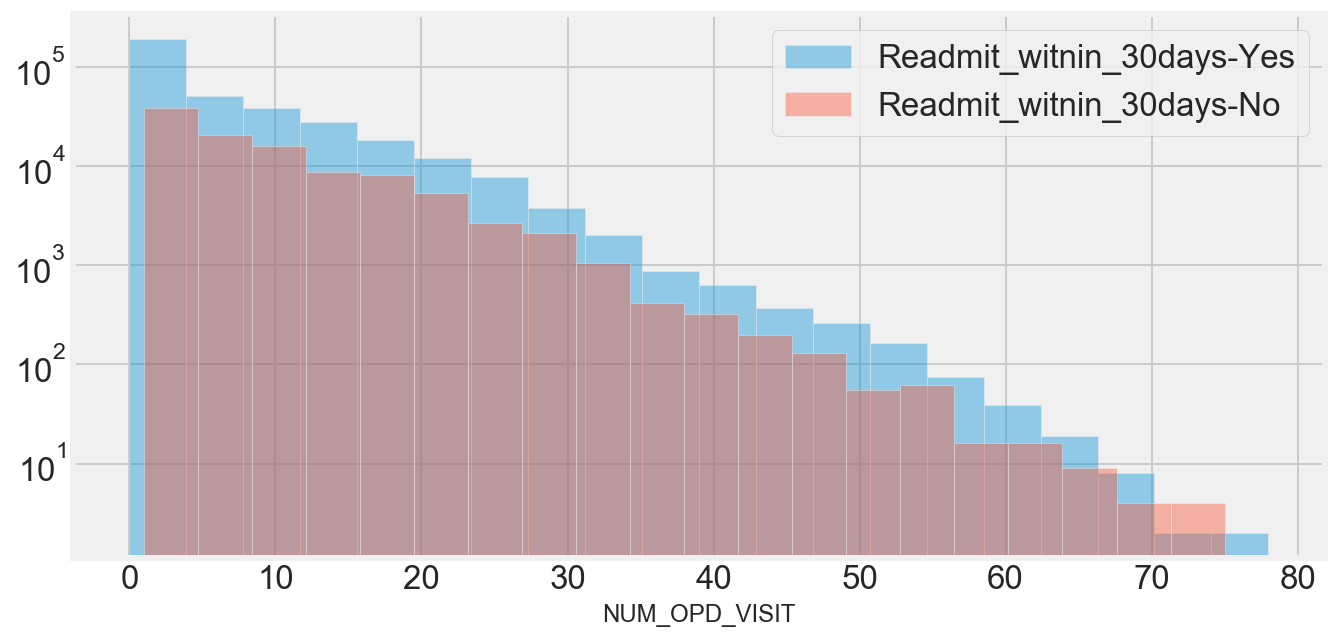

In [30]:
yes = df[df['READMIT30_FLAG'] == 1]['NUM_OPD_VISIT']
no = df[df['READMIT30_FLAG'] == 0]['NUM_OPD_VISIT']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

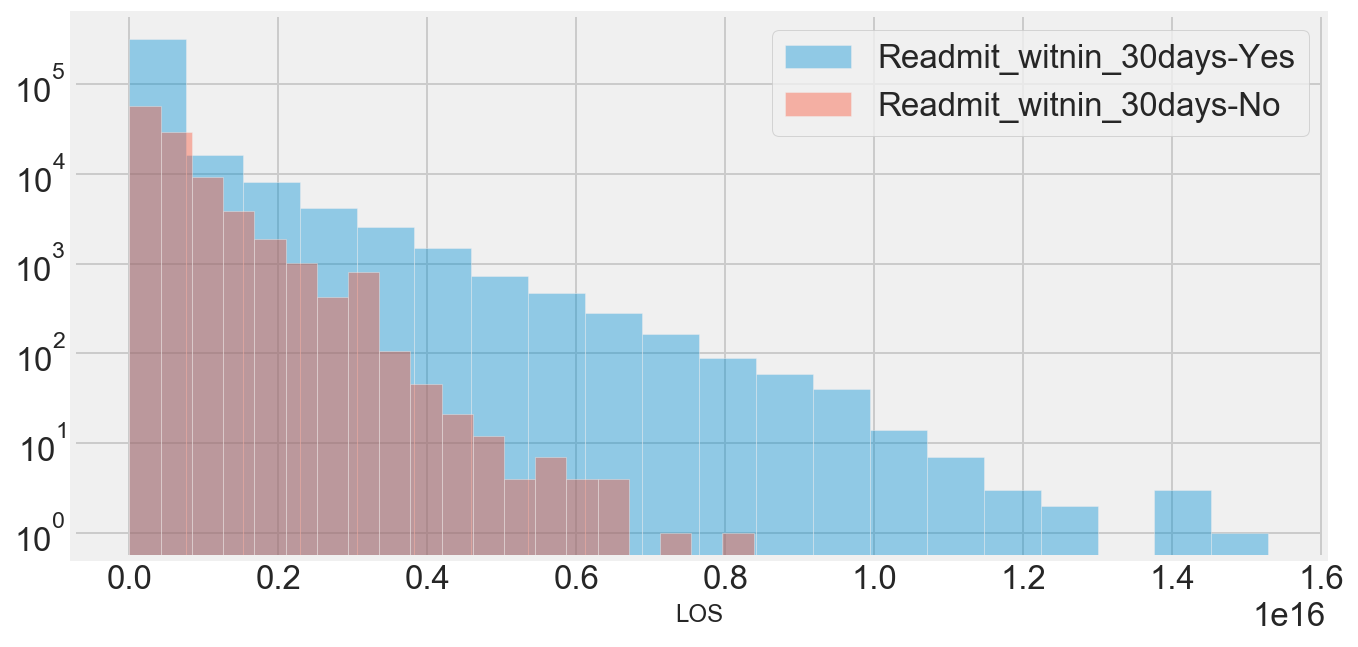

In [31]:
yes = df[df['READMIT30_FLAG'] == 1]['LOS']
no = df[df['READMIT30_FLAG'] == 0]['LOS']

fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(yes, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-Yes')
sns.distplot(no, bins=20, ax=ax, kde=False, label='Readmit_witnin_30days-No')
ax.legend()
plt.yscale('log')
plt.show()

### Visualizing the relationship between features (Hue as for readmit30 days flag)

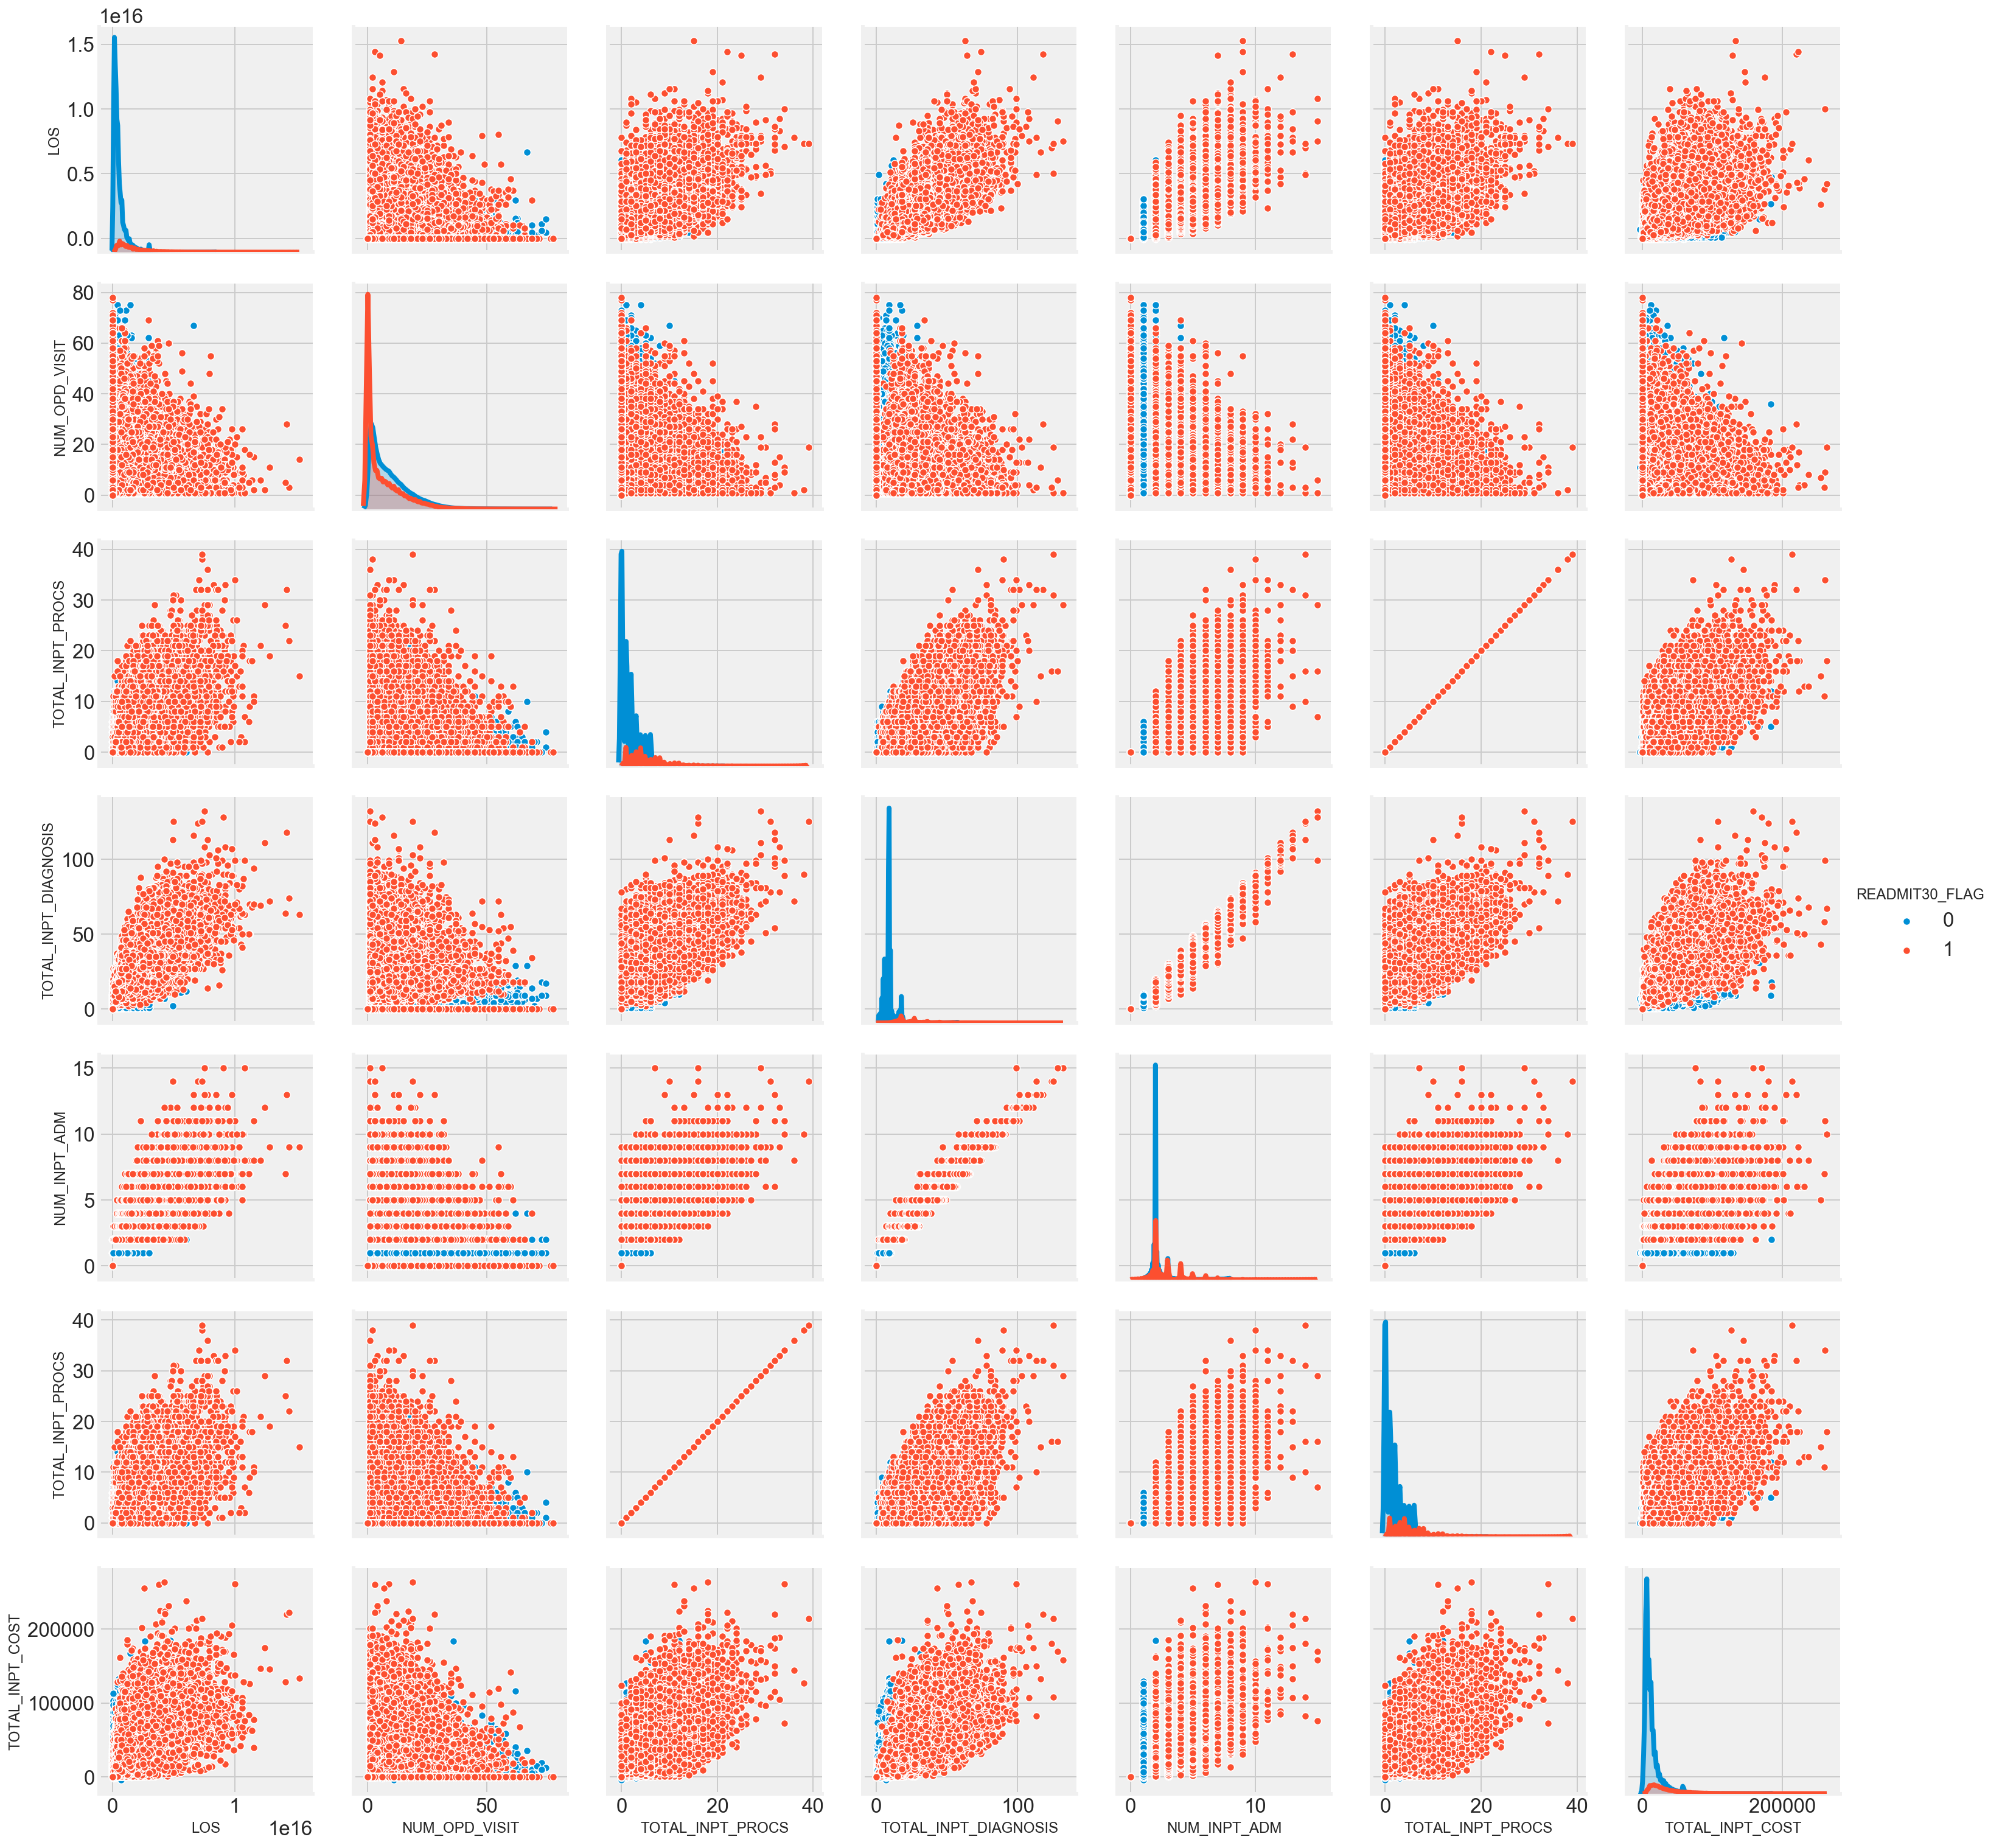

In [49]:
sns.pairplot(data=df, vars=['LOS', 'NUM_OPD_VISIT', 'TOTAL_INPT_PROCS', 'TOTAL_INPT_DIAGNOSIS', 
                            'NUM_INPT_ADM', 'TOTAL_INPT_PROCS', 'TOTAL_INPT_COST'], 
              hue='READMIT30_FLAG', height=3)
plt.show()

### Selecting Predictor and Target Variables

In [10]:
y = df_selected.pop('READMIT30_FLAG') 
X = df_selected  

print(X.shape)
print(y.shape)

(458328, 41)
(458328,)


### Checking for baseline accuracy

In [11]:
y.value_counts(normalize=True)  # 1 means readmission within 30 days, 0 means no

1    0.773832
0    0.226168
Name: READMIT30_FLAG, dtype: float64

In [12]:
type(y)

pandas.core.series.Series

#### Since the dataset doesn't seem to be too imbalance, not going with over or under sampling

### Train - Test split

In [13]:
# Creating Train, test split with Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y) #, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(366662, 41)
(366662,)
(91666, 41)
(91666,)


#### Standardize the data

In [14]:
# Standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Oversampling as there is class imbalance

In [15]:
#from imblearn.over_sampling import SMOTE, ADASYN

smote_nc = SMOTE(random_state=1)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(567470, 41)
(567470,)
(91666, 41)
(91666,)


### Principal Component Analysis to select important features and remove any colinearity among the features

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=28)  # 20 components have 82% variance, 28 PCA returns 95%, 32 PCA returns 98%

# PCA fit-tranform on train data
X_train_pca = pca.fit_transform(X_train)

# Converting into DataFrame
PCA_col_dict = {'PCA'+str(i+1): pca.components_[i]
            for i in range(len(pca.components_))}
X_train_pca = pd.DataFrame(X_train_pca, columns=PCA_col_dict) 
print(X_train_pca.shape)

# PCA tranform on test data
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=PCA_col_dict) 

print(X_test_pca.shape)

X_train_pca.head(2)

(567470, 28)
(91666, 28)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -2.922693 -0.727724 -1.141996  0.075728  0.441774  0.268865 -0.005538   
1  2.472376  2.957996  4.414405 -2.337586 -1.547614 -1.739763 -0.741052   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0  0.868811 -1.266274  0.084016  1.354542 -0.027833  0.041524  1.291664   
1 -0.489062  1.542525 -0.119749  0.166840 -0.238532  0.743886 -0.114282   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0 -0.521644 -0.251910 -0.038313  0.080450  0.026814  0.003781 -0.077661   
1 -2.992183  1.011668  0.219843 -0.223251  0.000270 -0.029179 -2.453457   

      PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28  
0 -0.024378 -0.055965 -0.026681 -0.022670  0.068971 -0.013077 -0.230322  
1  0.106533  0.132461 -0.203476  2.094661  0.956386 -0.386935  0.128277

In [17]:
explained_variance = pca.explained_variance_ratio_
explained_variance.cumsum()

array([0.20955964, 0.30885256, 0.38388143, 0.45310118, 0.51243194,
       0.54564408, 0.57685908, 0.60566281, 0.63234712, 0.65855542,
       0.68285122, 0.70504978, 0.72668402, 0.74736164, 0.76760705,
       0.78694024, 0.8056724 , 0.82359439, 0.84014537, 0.85620363,
       0.87068783, 0.88490772, 0.89899839, 0.91297874, 0.92592358,
       0.93818952, 0.95005675, 0.96164077])

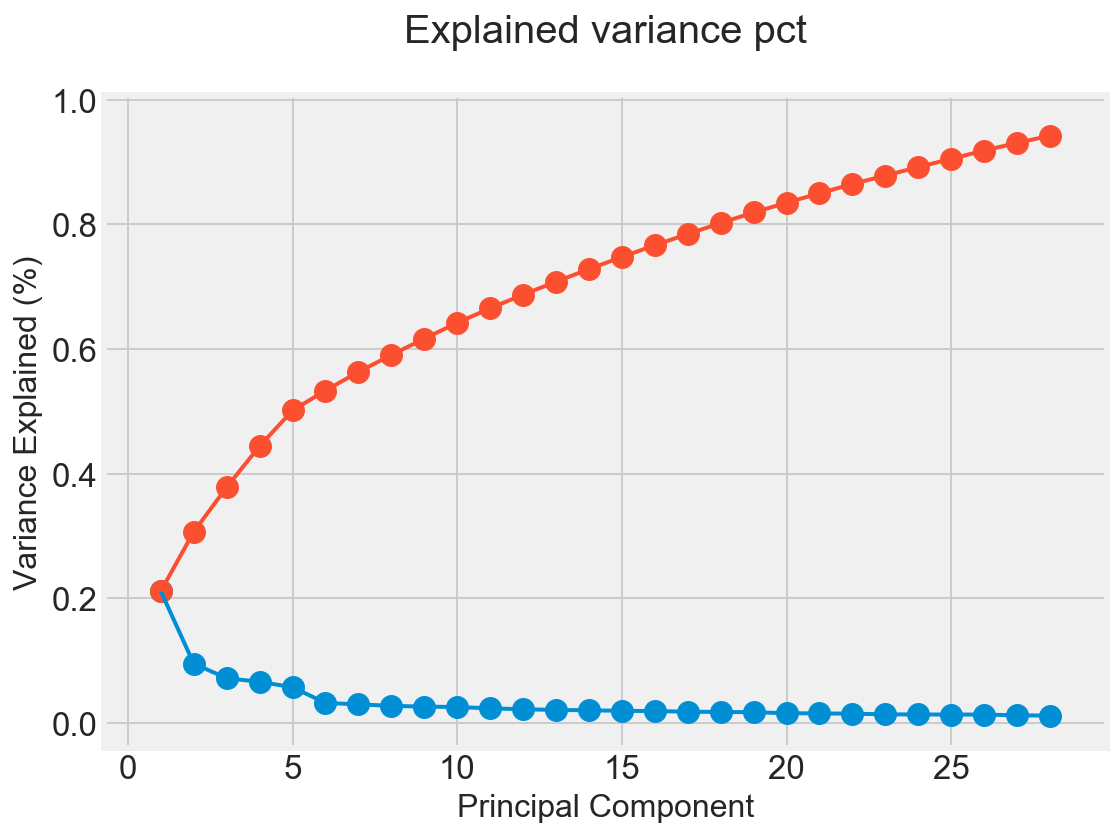

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, explained_variance, lw=2)
ax.scatter(x_values, explained_variance, s=120)
ax.plot(x_values, np.cumsum(explained_variance), lw=2)
ax.scatter(x_values, np.cumsum(explained_variance), s=120)

ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

### Mapping principal components with the features

In [18]:
cms_dict = {'PCA'+str(i+1): pca.components_[i]
            for i in range(len(pca.components_))}
pd.DataFrame(cms_dict, index=df_selected.columns)

PCA1      PCA2      PCA3      PCA4      PCA5  \
BENE_SEX_IDENT_CD     0.019188 -0.001051  0.001470 -0.001587 -0.009769   
BENE_RACE_CD         -0.021216 -0.006103 -0.000720 -0.000882  0.011336   
SP_ALZHDMTA2008      -0.182528 -0.001723 -0.002411 -0.003483 -0.141345   
SP_ALZHDMTA2009      -0.176426 -0.000585  0.000945  0.000018  0.122022   
SP_CHF2008           -0.233133 -0.002896 -0.002945  0.001152 -0.133549   
SP_CHF2009           -0.229187 -0.003070  0.002058  0.002442  0.132829   
SP_CHRNKIDN2008      -0.216815 -0.002432 -0.001776 -0.001328 -0.165640   
SP_CHRNKIDN2009      -0.217572 -0.002762  0.000601 -0.001068  0.123325   
SP_CNCR2008          -0.116541 -0.001247 -0.002140  0.000671 -0.068958   
SP_CNCR2009          -0.106482 -0.000009 -0.001699  0.001644  0.084815   
SP_COPD2008          -0.195087 -0.003109 -0.001523 -0.000887 -0.168571   
SP_COPD2009          -0.189921 -0.002990  0.003520 -0.000522  0.103020   
SP_DIABETES2008      -0.248034 -0.003653 -0.001913  0.000076 -0.058577   
SP_DIABETES2009      -0.243367 -0.003028  0.001826 -0.000910  0.149982   
SP_ISCHMCHT2008      -0.245018 -0.003014  0.000351 -0.001444 -0.068206   
SP_ISCHMCHT2009      -0.233910 -0.003679  0.000003 -0.000827  0.158338   
SP_OSTEOPRS2008      -0.139815  0.001214 -0.000179 -0.000115 -0.081909   
SP_OSTEOPRS2009      -0.131910  0.000786  0.001649 -0.001905  0.168929   
SP_RA_OA2008         -0.165663 -0.001760  0.000178 -0.001423 -0.073581   
SP_RA_OA2009         -0.156309  0.000595  0.001570  0.003290  0.143921   
SP_STRKETIA2008      -0.122507 -0.001746 -0.003408  0.000052 -0.154660   
TOTAL_DIAGNOSIS2008   0.326074  0.003390  0.002558  0.001471  0.176027   
TOTAL_DIAGNOSIS2009   0.321049  0.002800 -0.002243 -0.000137 -0.216009   
TOTAL_PAYMENT2008     0.211828  0.003134  0.002433  0.005261  0.262589   
TOTAL_PAYMENT2009     0.193498 -0.001019 -0.002624 -0.000189 -0.209931   
CHANGE_IN_PAYMEMT    -0.042939 -0.003820 -0.004470 -0.005164 -0.422223   
CHANGE_IN_DIAGNOSIS   0.005123 -0.000739 -0.006973 -0.002312 -0.570696   
AGE                   0.037911  0.002900 -0.000366 -0.000289  0.005889   
LOS                  -0.003289  0.242348  0.358894 -0.076825 -0.004800   
NUM_INPT_ADM         -0.001922  0.258898  0.350485 -0.071108 -0.004549   
TOTAL_INPT_COST      -0.003141  0.258910  0.375151 -0.080285 -0.005137   
TOTAL_INPT_DIAGNOSIS -0.002755  0.258750  0.355488 -0.072613 -0.003939   
TOTAL_INPT_PROCS     -0.002866  0.244002  0.363480 -0.079324 -0.004320   
NUM_OPD_VISIT        -0.003894  0.408342 -0.286547 -0.081768  0.002493   
TOTAL_OPD_COST       -0.003013  0.342097 -0.291748 -0.087033  0.002175   
TOTAL_OPD_DIAGNOSIS  -0.003465  0.408343 -0.294204 -0.084296  0.002707   
TOTAL_OPD_PROCS      -0.000024  0.030781 -0.030510 -0.008940 -0.002669   
TOTAL_OPD_HCPCS      -0.004044  0.415543 -0.304688 -0.088000  0.003027   
TOTAL_QTY_DSPNSD_NUM -0.002921  0.141209  0.022339  0.556746 -0.004159   
PTNT_PAY_RX_AMT      -0.002897  0.136104  0.021619  0.559161 -0.003680   
TOT_RX_CST_AMT       -0.003237  0.133828  0.021180  0.564890 -0.004843   

                          PCA6      PCA7      PCA8      PCA9     PCA10  \
BENE_SEX_IDENT_CD    -0.089408  0.037445 -0.220290  0.644714 -0.049510   
BENE_RACE_CD          0.001335  0.026783  0.188171 -0.301573  0.039749   
SP_ALZHDMTA2008       0.112257  0.014333 -0.105924 -0.041866  0.012832   
SP_ALZHDMTA2009      -0.042677 -0.153420 -0.069246 -0.045675  0.003406   
SP_CHF2008            0.099315  0.018267 -0.072951 -0.027331 -0.002107   
SP_CHF2009           -0.034107 -0.125875 -0.061998 -0.031687  0.005407   
SP_CHRNKIDN2008      -0.030037 -0.024338 -0.169080 -0.034799  0.004015   
SP_CHRNKIDN2009      -0.051378 -0.038124 -0.203725 -0.036874  0.003296   
SP_CNCR2008          -0.447714  0.497135  0.136808  0.003866  0.003393   
SP_CNCR2009          -0.456177  0.498344  0.128608  0.000844  0.006981   
SP_COPD2008          -0.050272 -0.016475 -0.175483 -0.044889  0.004254   
SP_COPD2009          -0.10992

#### 32 PCA's return 95% of variance,  28 PCA's return 90% variance and 20 PCA's return 82% variance

#### Correlation of X_train features

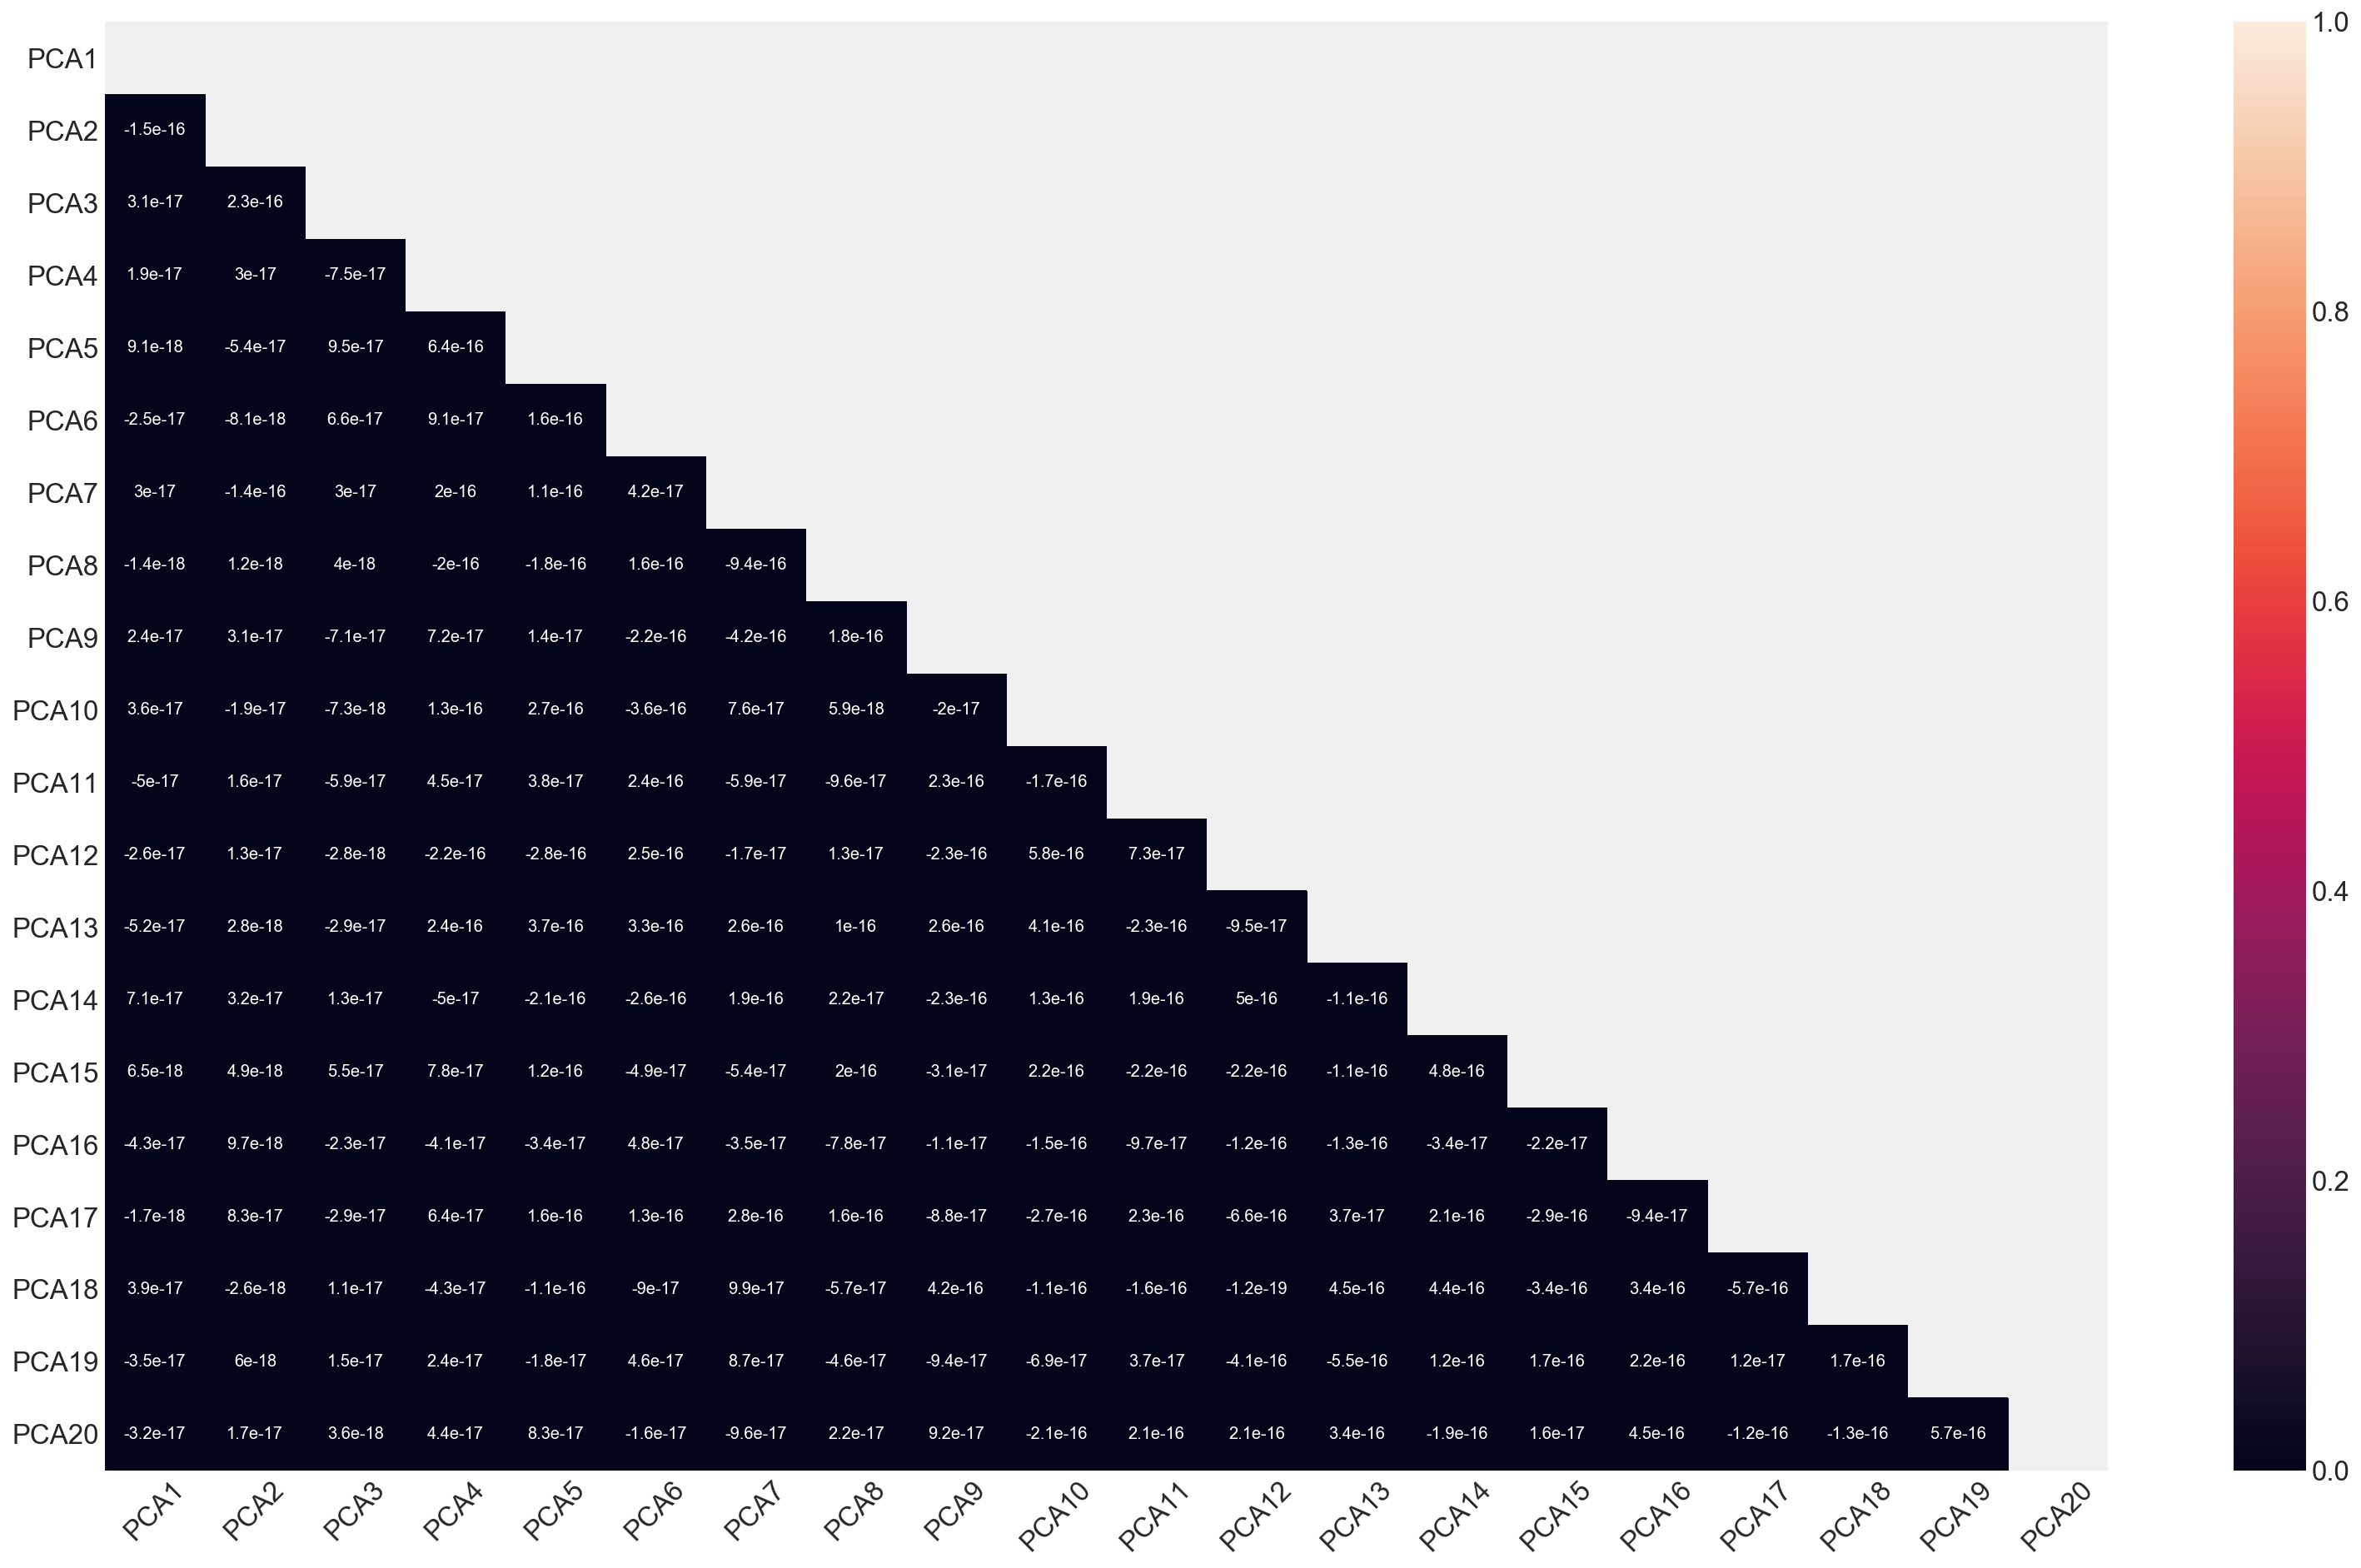

In [41]:
X_train_pca_corr = X_train_pca.corr()

mask = np.zeros_like(X_train_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_train_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_train_pca_corr.shape[1], 0)
plt.show()

#### Correlation of X_test features

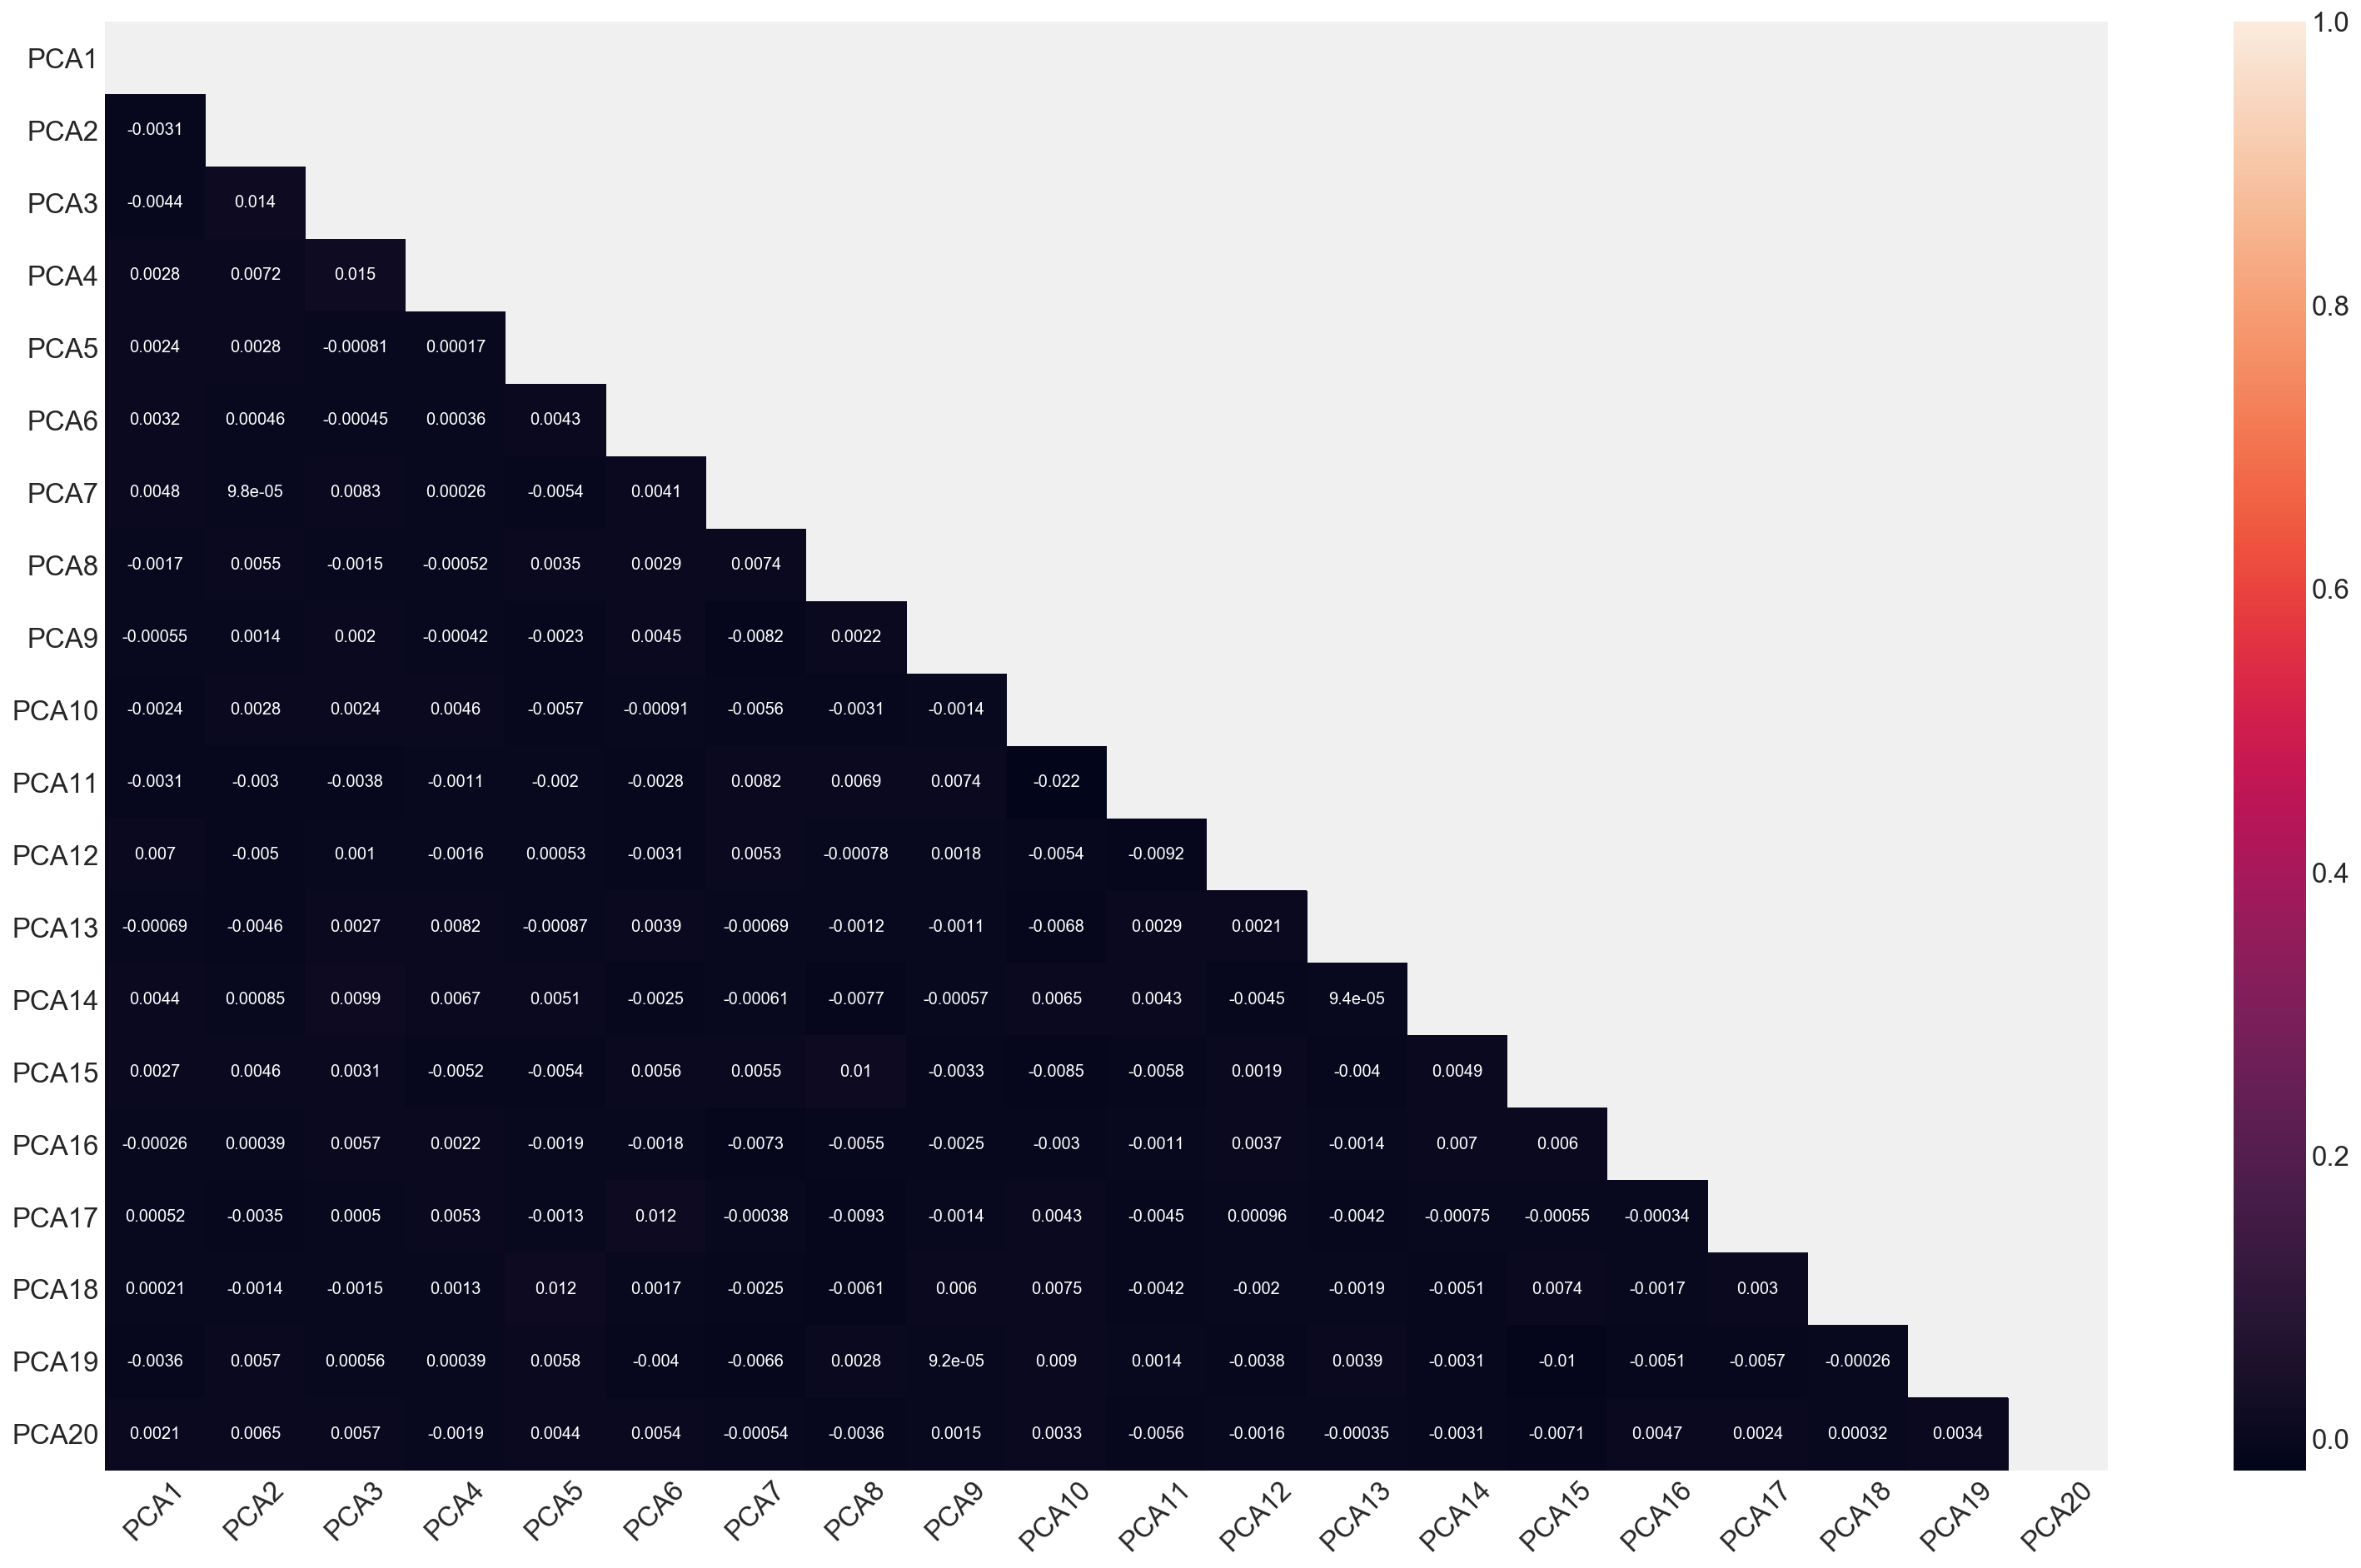

In [42]:
X_test_pca_corr = X_test_pca.corr()

mask = np.zeros_like(X_test_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_test_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_test_pca_corr.shape[1], 0)
plt.show()

### Saving my data to a csv file to be used in next jupyter notebook for modelling

In [19]:
X_train_pca.to_csv(r'/Users/abhi/Documents/Abhi/General Assembly/Immersive course/Capstone Project/CMS_Data/filetransfer/X_train_pca.csv', header=True) 
y_train.to_csv(r'/Users/abhi/Documents/Abhi/General Assembly/Immersive course/Capstone Project/CMS_Data/filetransfer/y_train.csv', header=True) 

X_test_pca.to_csv(r'/Users/abhi/Documents/Abhi/General Assembly/Immersive course/Capstone Project/CMS_Data/filetransfer/X_test_pca.csv', header=True)
y_test.to_csv(r'/Users/abhi/Documents/Abhi/General Assembly/Immersive course/Capstone Project/CMS_Data/filetransfer/y_test.csv', header=True) 

In [ ]:
# -----------------    To delete from here --------------

### Uploading X_train, X_test, y_train, y_test to run the models

In [ ]:
X_train_pca = pd.read_csv('X_train_pca.csv') #, header=False, inferSchema=True)
del X_train_pca['Unnamed: 0']

print(X_train_pca.shape)
X_train_pca.head(2)

In [ ]:
y_train = pd.read_csv('y_train.csv') #, header=False, inferSchema=True)
del y_train['Unnamed: 0']

print(y_train.shape)
y_train.head(2)

In [ ]:
X_test_pca = pd.read_csv('X_test_pca.csv') #, header=False, inferSchema=True)
del X_test_pca['Unnamed: 0']

print(X_test_pca.shape)
X_test_pca.head(2)

In [ ]:
y_test = pd.read_csv('y_test.csv') #, header=False, inferSchema=True)
del y_test['Unnamed: 0']

print(y_test.shape)
y_test.head(2)

### Instead of fitting the model - I am uploading already fitted models from AWS

In [ ]:
import joblib
import pickle

modelRF_GS = joblib.load('modelRF_GS.jlib')
modelLR_base
modelDT_base
modelRF_base
knn_base
modelSVM_base
lr_gridsearch
DT_Classifier_gridsearch
modelRF_GS

### Building basic Logistic Regression model for readmission prediction

In [69]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 1, 38, 390681)

In [70]:
modelLR = LogisticRegression()
modelLR.fit(X_train_pca,y_train)
datetime.now()

datetime.datetime(2020, 5, 14, 19, 1, 38, 940750)

In [71]:
print("Score(Train): ", modelLR.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelLR, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelLR.score(X_test_pca, y_test))

Score(Train):  0.74216308207559
Cross Val Score (Train):  0.7421548961325852
Score (Test):  0.7429363122640892


In [72]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 1, 41, 972669)

In [59]:
importance = modelLR.coef_[0]

importanceDF = pd.DataFrame(importance, index=X_train_pca.columns, columns=["Importance"])
importanceDF.sort_values(by='Importance', ascending=False).head(15)

Importance
PCA11    0.023943
PCA4     0.013016
PCA19    0.011292
PCA14    0.008938
PCA15    0.007284
PCA12    0.005593
PCA10    0.005250
PCA13    0.005059
PCA6     0.003951
PCA5     0.003382
PCA17    0.002658
PCA20    0.002230
PCA8     0.000860
PCA18    0.000671
PCA1    -0.000872

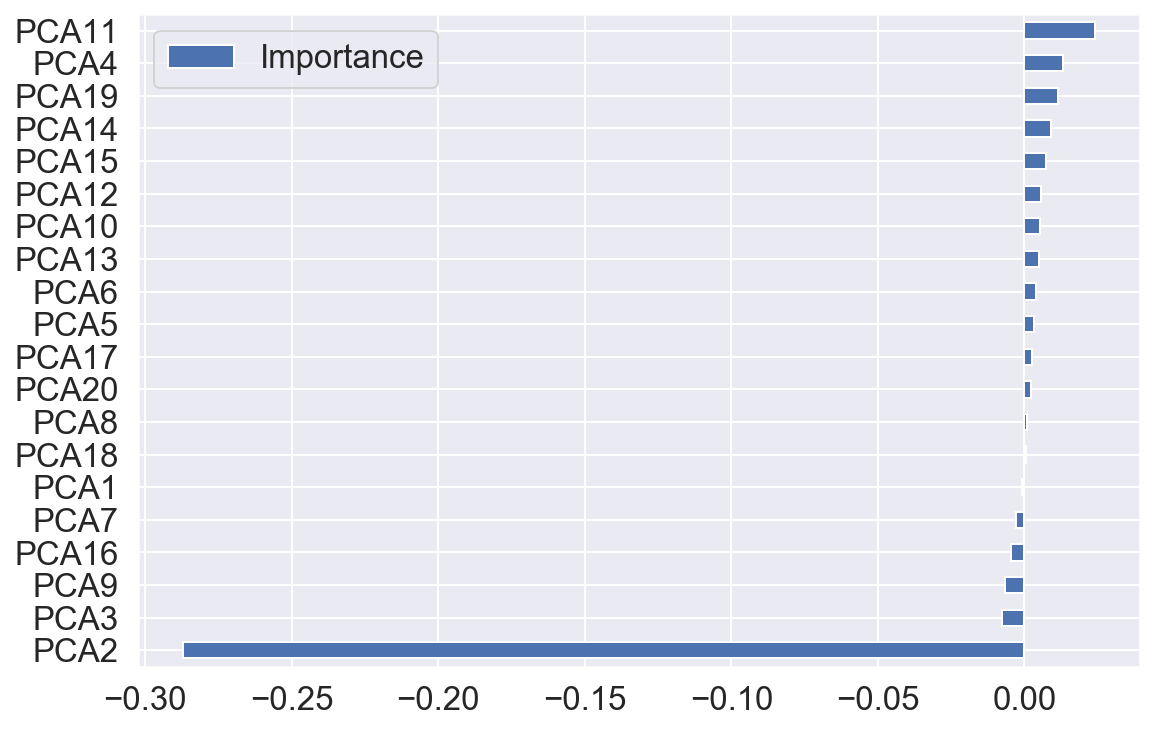

In [60]:
importanceDF.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(8, 6))
plt.show()

In [61]:
#print(pca.inverse_transform(X_train_pca)) # heptadepthom nlab

In [62]:
# Predictons and Probabilities

predictions_LRBase = modelLR.predict(X_test_pca)
#predictions_LRBase

probabilities_LRBase = modelLR.predict_proba(X_test_pca)
#probabilities_LRBase

In [63]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_LRBase, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

Predicted_No_Readmissions  Predicted_Readmissions
True_No_Readmissions                        482                   20250
True_Readmissions                          3398                   67536

In [64]:
print(classification_report(y_test, predictions_LRBase))

              precision    recall  f1-score   support

           0       0.12      0.02      0.04     20732
           1       0.77      0.95      0.85     70934

    accuracy                           0.74     91666
   macro avg       0.45      0.49      0.45     91666
weighted avg       0.62      0.74      0.67     91666



In [53]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

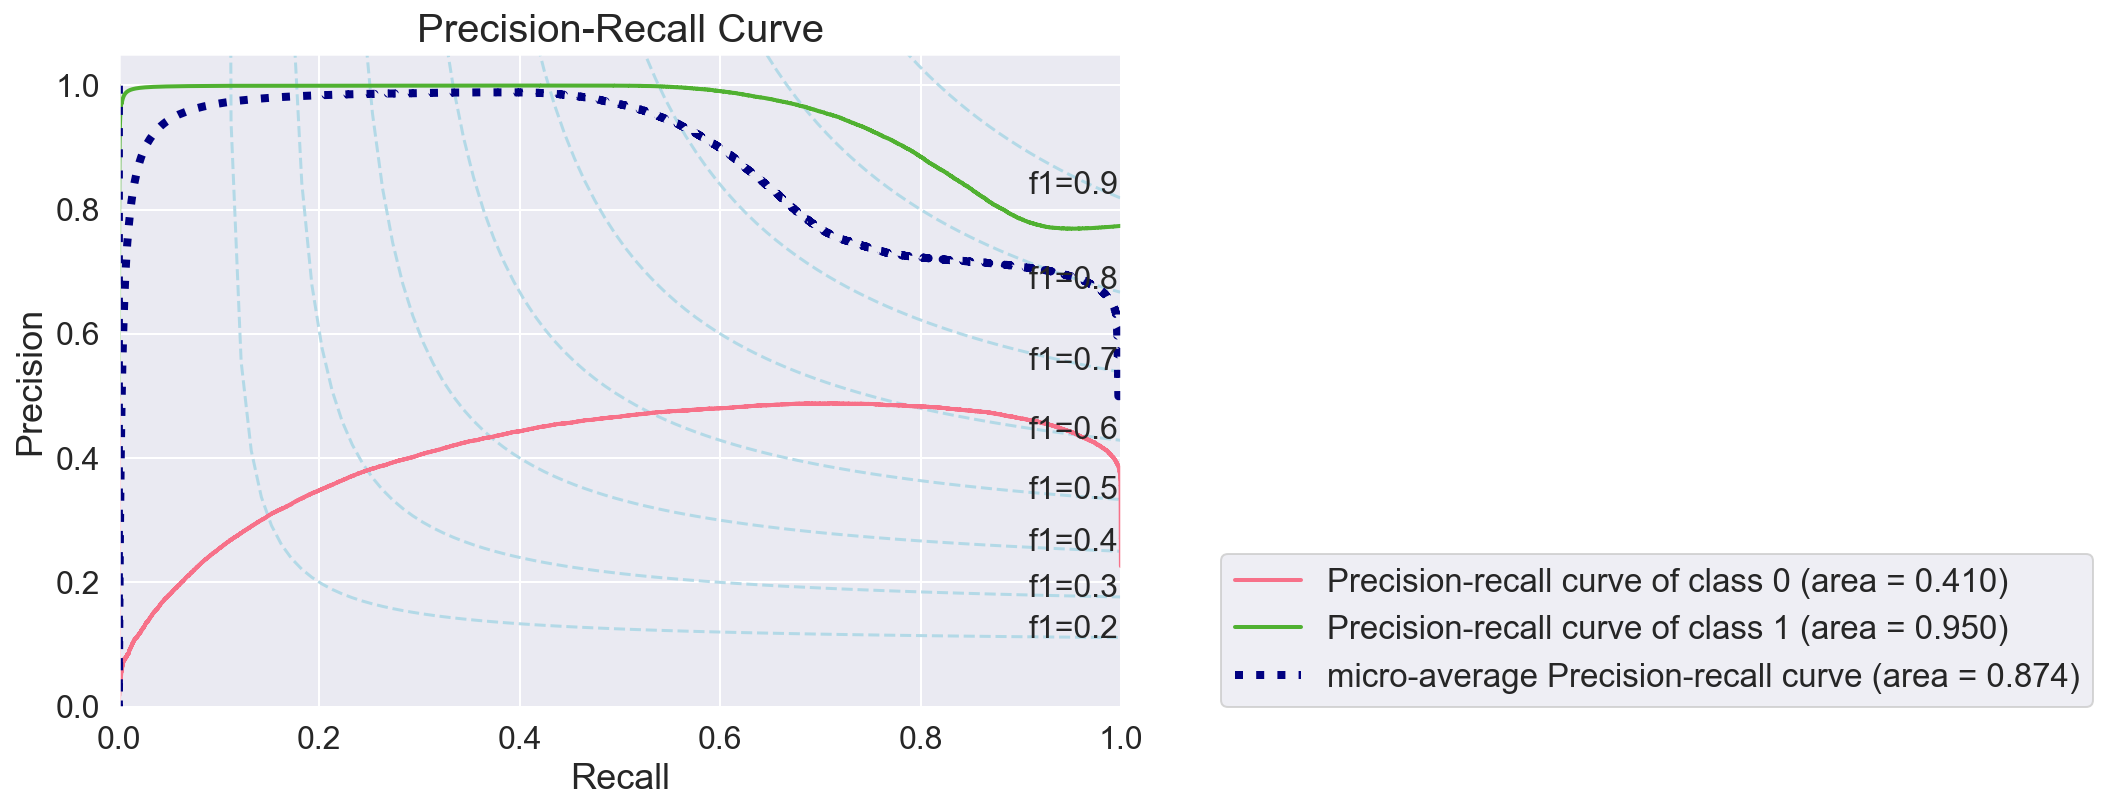

In [66]:
# plot_f1_lines # already defined

# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_LRBase, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

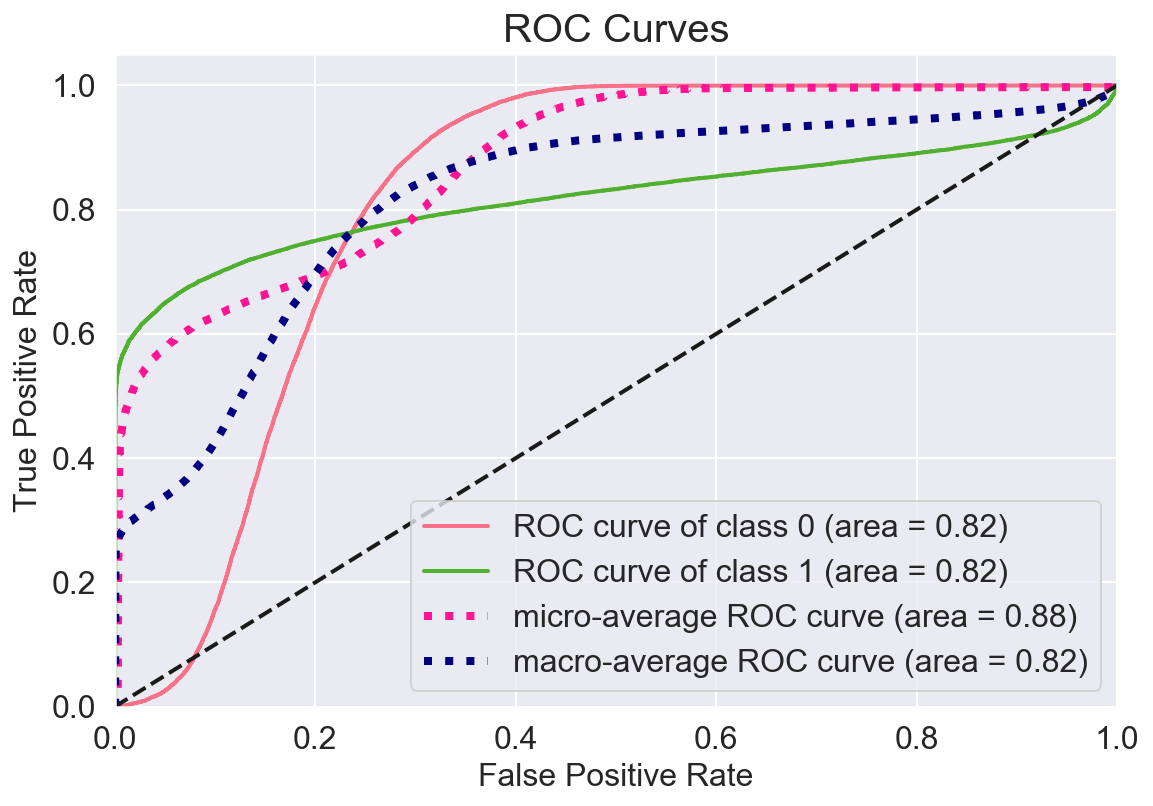

In [67]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_LRBase, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [73]:
# saving model 

import joblib
import pickle


joblib.dump(modelLR, 'modelLR_base.jlib')

['modelLR_base.jlib']

In [74]:
datetime.now()  

datetime.datetime(2020, 5, 14, 19, 4, 30, 359003)

In [75]:
# Logistic Regression GridSearch  - TO DO 

gs_lr_params = {'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga'],
                'C': np.logspace(-3, 0, 3)} #np.logspace(-3, 0, 5) } #np.logspace(-3, 0, 100)}  # increase c to +ve

model_LR = LogisticRegression(solver='liblinear', multi_class='ovr')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

lr_gridsearch = GridSearchCV(estimator=model_LR,
                             param_grid=gs_lr_params,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=3,     # runs on 3 cores
                             verbose=1)

In [76]:
datetime.now()  

datetime.datetime(2020, 5, 14, 19, 4, 31, 192847)

In [77]:
lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.6min
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  9.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([0.001     , 0.03162278, 1.        ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='a

In [78]:
print('Best Paramaters (logistic Regression): ', lr_gridsearch.best_params_)
print('Best Score (logistic Regression): ', lr_gridsearch.best_score_)
print('Best Logistic Regression: ' , lr_gridsearch.best_estimator_)

Best Paramaters (logistic Regression):  {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
Best Score (logistic Regression):  0.7384866703426328
Best Logistic Regression:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [79]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 14, 41, 949880)

In [80]:
lr_gridsearch.score(X_test, y_test)

0.7389871926341283

In [81]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 14, 41, 979047)

In [82]:
joblib.dump(lr_gridsearch, 'lr_gridsearch.jlib')

['lr_gridsearch.jlib']

### Random Forest

In [63]:
datetime.now()

datetime.datetime(2020, 5, 14, 18, 45, 8, 317527)

In [64]:
modelRF = RandomForestClassifier() 
modelRF.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
datetime.now()

datetime.datetime(2020, 5, 14, 18, 48, 35, 176224)

In [66]:
print("Score(Train): ", modelRF.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelRF, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelRF.score(X_test_pca, y_test))

Score(Train):  1.0
Cross Val Score (Train):  0.9500439069772211
Score (Test):  0.9493923592171579


In [67]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 1, 38, 196420)

In [68]:
joblib.dump(modelRF, 'modelRF_base.jlib')

['modelRF_base.jlib']

In [ ]:
''' # when ran withoOUT vectorizer - RF (but WITH gini and 100 estimators)

Score(Train):  1.0
Cross Val Score (Train):  0.9432718529372724
Score (Test):  0.9421599441243234
    
# when ran withoOUT vectorizer - RF (but WITHout gini and 100 estimators)

Score(Train):  0.9972236010276494  (28 PCA)
Cross Val Score (Train):  0.9416274400747433
Score (Test):  0.9416141208299696
    
# when ran WITH vectorizer - RF  (but without gini and 100 estimators)

Score(Train):  0.9970763264259727
Cross Val Score (Train):  0.8548963139654087
Score (Test):  0.858278969301595
    
# when ran WITH vectorizer - RF  (but WITH gini and 100 estimators)

Score(Train):  1
Cross Val Score (Train):  
Score (Test): 
'''

In [ ]:
datetime.now()

### Random Forest Grid Search

In [39]:
datetime.now() 

datetime.datetime(2020, 5, 14, 18, 1, 9, 127025)

In [40]:
param_grid_RF = { 
                    'n_estimators': [10, 50], #, 100],  #, 200
                    'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4, None],  # 10, 20,
                    'criterion' :['gini', 'entropy']
                }

In [41]:
modelRF_ = RandomForestClassifier(random_state=1) 
modelRF_GS = GridSearchCV(estimator=modelRF_, param_grid=param_grid_RF, cv= 3)  # cv=5
modelRF_GS.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [42]:
datetime.now()

datetime.datetime(2020, 5, 14, 18, 7, 21, 469993)

In [43]:
print("Best score (Random Forest): ", modelRF_GS.best_score_)
print("Best params (Random Forest): ", modelRF_GS.best_params_)
print("Best estimator (Random Forest): ", modelRF_GS.best_estimator_)

Best score (Random Forest):  0.9694650653606995
Best params (Random Forest):  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
Best estimator (Random Forest):  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [44]:
datetime.now()

datetime.datetime(2020, 5, 14, 18, 7, 21, 483896)

In [45]:
print('Test Score: ' , modelRF_GS.best_estimator_.score(X_test,y_test))

Test Score:  0.9707197870529968


In [46]:
datetime.now()

datetime.datetime(2020, 5, 14, 18, 7, 22, 83084)

In [88]:
predictions_RF_GS = modelRF_GS.best_estimator_.predict(X_test)
#predictions_RF_GS

probabilities_RF_GS = modelRF_GS.best_estimator_.predict_proba(X_test)
#probabilities_RF_GS

In [89]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_RF_GS, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

Predicted_No_Readmissions  Predicted_Readmissions
True_No_Readmissions                      18294                    2438
True_Readmissions                           332                   70602

In [90]:
print(classification_report(y_test, predictions_RF_GS))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     20732
           1       0.97      1.00      0.98     70934

    accuracy                           0.97     91666
   macro avg       0.97      0.94      0.96     91666
weighted avg       0.97      0.97      0.97     91666



NameError: name 'skplt' is not defined

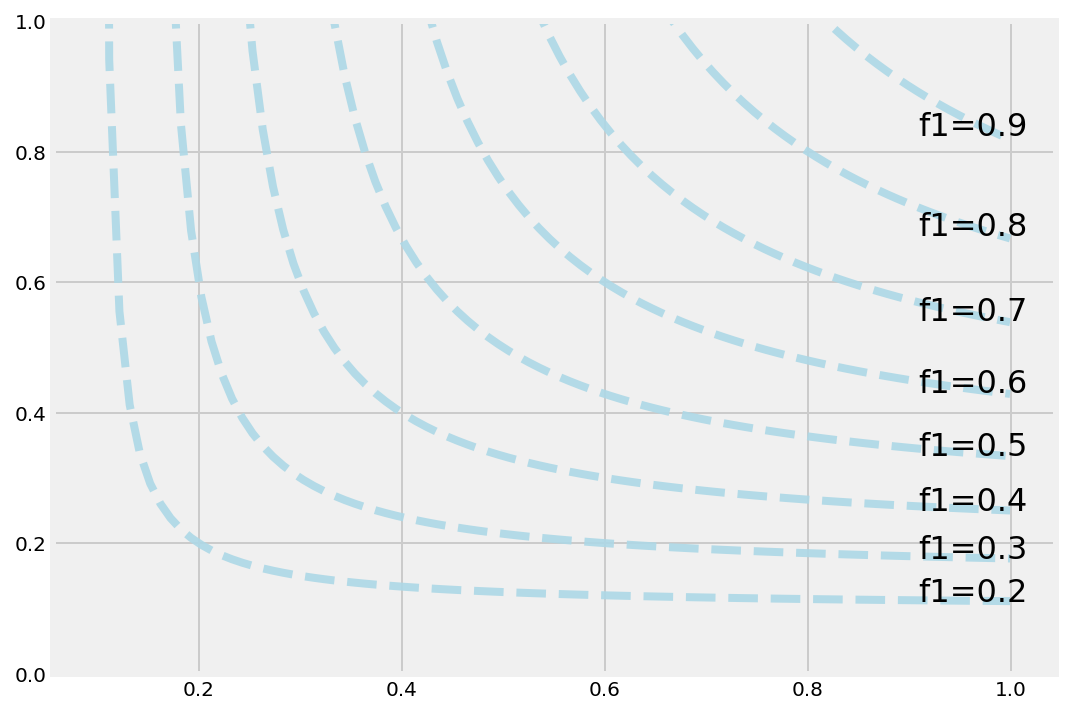

In [54]:
# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_RF_GS, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

In [55]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_RF_GS, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

NameError: name 'skplt' is not defined

In [ ]:
datetime.now()

In [58]:
joblib.dump(modelRF_GS, 'modelRF_GS.jlib')

['modelRF_GS.jlib']

### Decison Tree

In [34]:
datetime.now()

datetime.datetime(2020, 5, 14, 18, 0, 17, 909474)

In [35]:
# Base model
modelDT = DecisionTreeRegressor()                     #criterion='mse',  max_depth=None, random_state=1
modelDT.fit(X_train_pca, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
datetime.now()

datetime.datetime(2020, 5, 14, 18, 0, 29, 295724)

In [37]:
print("Score(Train): ", modelDT.score(X_train_pca, y_train))  
print("Cross Val Score (Train): ", cross_val_score(modelDT, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelDT.score(X_test_pca, y_test))

Score(Train):  1.0
Cross Val Score (Train):  0.6384073649229812
Score (Test):  0.6318658790144419


In [38]:
datetime.now()

datetime.datetime(2020, 5, 14, 18, 1, 9, 120914)

In [59]:
joblib.dump(modelDT, 'modelDT_base.jlib')

['modelDT_base.jlib']

In [83]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 14, 41, 995361)

In [84]:
DT_Classifier_params = {'max_depth': [None, 1,3],                              #list(range(1, 4))+[None], #'max_depth': [None, 1,2,3,4,5],#list(range(1, 11))
                        'criterion' :['gini', 'entropy'], 
                        'max_features': [None, 1, 2, 3],
                        'min_samples_split': [2,  10],                         #, 25, 50], #[2, 5, 10, 20, 30, 50],
                        'min_samples_leaf': [1, 4]                             # [1, 2, 3, 4]
                                                                               #,'ccp_alpha': [0, 0.001, 0.005, 0.01]
                       }
classifier = DecisionTreeClassifier(random_state=1)

In [85]:
DT_Classifier_gridsearch = GridSearchCV(estimator=classifier,
                                         param_grid=DT_Classifier_params,
                                         cv=kf,
                                         #scoring='accuracy',
                                         n_jobs=3,     # runs on 3 cores
                                         verbose=1)


In [86]:
DT_Classifier_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   31.8s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  2.7min
[Parallel(n_jobs=3)]: Done 480 out of 480 | elapsed:  2.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
  

In [87]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 17, 28, 683287)

In [88]:
print("Best score (Decision Tree): ", DT_Classifier_gridsearch.best_score_)
print("Best params (Decision Tree): ", DT_Classifier_gridsearch.best_params_)
print("Best estimator (Decision Tree): ", DT_Classifier_gridsearch.best_estimator_)

Best score (Decision Tree):  0.9708341710682818
Best params (Decision Tree):  {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator (Decision Tree):  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [89]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 17, 28, 697262)

In [90]:
print('Test Score: ' , DT_Classifier_gridsearch.best_estimator_.score(X_test,y_test))

Test Score:  0.9717670673968538


In [91]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 17, 28, 730143)

In [111]:
# Predictons and Probabilities 
predictions_DT = DT_Classifier_gridsearch.best_estimator_.predict(X_test) 
#predictions_DT 
probabilities_DT = DT_Classifier_gridsearch.best_estimator_.predict_proba(X_test) 
#probabilities_DT

In [112]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_DT, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])


Predicted_No_Readmissions  Predicted_Readmissions
True_No_Readmissions                      18085                    2647
True_Readmissions                             0                   70934

In [113]:
print(classification_report(y_test, predictions_DT))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     20732
           1       0.96      1.00      0.98     70934

    accuracy                           0.97     91666
   macro avg       0.98      0.94      0.96     91666
weighted avg       0.97      0.97      0.97     91666



In [114]:
datetime.now()

datetime.datetime(2020, 5, 14, 6, 10, 36, 111371)

In [92]:
joblib.dump(DT_Classifier_gridsearch, 'DT_Classifier_gridsearch.jlib')

['DT_Classifier_gridsearch.jlib']

### KNN 

In [17]:
# Base model KNN
datetime.now()

datetime.datetime(2020, 5, 14, 9, 27, 19, 575973)

In [18]:
knn = KNeighborsClassifier()                                                                # n_neighbors=5
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
datetime.now() # takes 50 mins on AWS

datetime.datetime(2020, 5, 14, 9, 27, 53, 886142)

In [22]:
X_train_pca.shape, y_train.shape, X_test_pca.shape, y_test.shape

((366662, 20), (366662,), (91666, 20), (91666,))

In [23]:
print("Score(Train): ", knn.score(X_train_pca, y_train))  
print("Cross Val Score (Train): ", cross_val_score(knn, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", knn.score(X_test_pca, y_test))

Score(Train):  0.9298563799902908
Cross Val Score (Train):  0.8946713871311397
Score (Test):  0.8965483385333711


In [24]:
datetime.now()

datetime.datetime(2020, 5, 14, 10, 16, 4, 843130)

In [61]:
joblib.dump(knn, 'knn_base.jlib')

['knn_base.jlib']

In [93]:
datetime.now()

datetime.datetime(2020, 5, 14, 19, 19, 32, 98)

In [94]:
gs_knn_params = {
                'n_neighbors': [5, 10],                                    #  25, 50], #[5, 15, 25, 35, 40, 45, 50, 60, 75],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
                }

model_KNN = KNeighborsClassifier()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
knn_gridsearch = GridSearchCV(estimator=model_KNN,
                             param_grid=gs_knn_params,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=-1,                                      # runs on 3 cores
                             verbose=1)                                      # return_train_score=True
knn_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
datetime.now()

In [ ]:
# Printing parameters

print('Best Paramaters (KNN): ', knn_gridsearch.best_params_)
print('Best Score (KNN): ', knn_gridsearch.best_score_)
print('Best KNN ' , knn_gridsearch.best_estimator_)

In [ ]:
datetime.now()

In [ ]:
print('Test Score: ', knn_gridsearch.best_estimator_.score(X_test_pca,y_test))

In [ ]:
datetime.now()

In [ ]:
predictions_KNN = knn_gridsearch.best_estimator_.predict(X_test_pca)
#predictions_KNN

probabilities_KNN = knn_gridsearch.best_estimator_.predict_proba(X_test_pca)
#probabilities_KNN

In [ ]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_KNN, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

In [ ]:
print(classification_report(y_test, predictions_KNN))

In [ ]:
datetime.now()

In [ ]:
joblib.dump(knn_gridsearch, 'knn_gridsearch.jlib')

### SVM

In [25]:
datetime.now()  

datetime.datetime(2020, 5, 14, 10, 16, 4, 849949)

In [26]:
# Base model  # took 1hr 30 mins to initialize the object in AWS

modelSVM = SVC()
modelSVM.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
datetime.now()

datetime.datetime(2020, 5, 14, 11, 49, 3, 165596)

In [ ]:
print("Score(Train): ", modelSVM.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelSVM, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelSVM.score(X_test_pca, y_test))

Score(Train):  0.9518548417888955


In [ ]:
datetime.now() # takes over 5 hrs 0 mins in AWS

In [62]:
joblib.dump(modelSVM, 'modelSVM_base.jlib')

['modelSVM_base.jlib']

In [133]:

gs_SVM_params = {'gamma': np.linspace(0.01, 2, 2),  #np.linspace(0.01, 2, 10),
                'kernel': ['rbf'],#,'linear', 'poly'],#, 'rbf', 'sigmoid'],  # , 'precomputed'
                'C': np.logspace(-2, 2, 2)}   

modelSVM_GS = SVC()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

SVM_gridsearch = GridSearchCV(estimator=modelSVM_GS,
                             param_grid=gs_SVM_params,
                             cv=kf,
                             #scoring='accuracy',
                             n_jobs=3,     # runs on 3 cores
                             verbose=1,
                             error_score = 0.0)


SVM_gridsearch.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


KeyboardInterrupt: 

In [ ]:
datetime.now()

In [ ]:
print('Best Paramaters (SVM): ', SVM_gridsearch.best_params_)
print('Best Score (SVM): ', SVM_gridsearch.best_score_)
print('Best SVM: ' , SVM_gridsearch.best_estimator_)

In [ ]:
datetime.now()

In [ ]:
print('Test Score: ' , SVM_gridsearch.best_estimator_.score(X_test_pca,y_test))

In [1]:
datetime.now()

NameError: name 'datetime' is not defined

In [ ]:
def grid_search_func(estimator, params, X_train, y_train, X_test, y_test, scoring_function=metrics.accuracy_score, scoring='accuracy', cv=5):
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=params,
        return_train_score=True,
        scoring=scoring,
        cv=cv)

    gs.fit(X_train, y_train)
    datetime.now()
    
    print("Best score")
    print(gs.best_score_)
    print()
    print("Best estimator")
    print(gs.best_estimator_.get_params())
    print()
    datetime.now()

    predictions = gs.best_estimator_.predict(X_test)
    print('Test score: ', scoring_function(y_test, predictions))
    print()
    print_cm_cr(y_test, predictions)
    datetime.now()
    
    return gs

In [ ]:
params_rbf = {'C': np.logspace(-2, 2, 11),
              'gamma': np.linspace(0.01, 2, 10)}

gs_rbf = grid_search_func(model_rbf, params_rbf,
                          X_train, y_train, X_test, y_test)

In [ ]:
datetime.now()

In [ ]:
# Write function for diff models and grid search pipeline
try with and without over sampling
LR,
KNN,
DT,
RF
SVM
AdaBoost?
change threshold of probability and see if the accuracy gets better
is recall or precision more imp for me 

death prediction
cost prediction
disease prediction

d0 ensembling ??

In [ ]:
#week 5 day 1

pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

pipe.fit(X, y)

columns_to_drop = ['PassengerId', 'Name']
columns_to_dummify = ['Sex', 'Pclass', 'Embarked']

tprep = TitanticPreprocessor(columns_to_drop=columns_to_drop,
                             columns_to_dummify=columns_to_dummify)
scaler = StandardScaler()
model = LogisticRegression(solver='lbfgs', random_state=1)

pipe = Pipeline(steps=[('titanic_prep', tprep),
                       ('scaler', scaler),
                       ('model', model)
                      ]
               )


scaler = StandardScaler()
#scaler = MinMaxScaler()
poly = PolynomialFeatures(include_bias=False)
model = LogisticRegression(solver='lbfgs')
#model = KNeighborsClassifier()
fu_pipe = Pipeline(steps=(('union', fu),
                          ('poly', poly),
                          ('scaler', scaler),
                          ('model', model)))

In [ ]:
# setup the grid search

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

In [ ]:
# Can I find imp features (rev engg PCAs to real feature) - https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a

In [ ]:
# Can i do deeper analytics to find which diseases are mostly like for readmssion or mots/leat expenseive so that we 

# can target the low hanging fruits

In [ ]:
# Can i look at probablities and figure out the index and relate to the patient

In [ ]:
final2008_2009DF_selectedFeatures['READMIT7'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT30'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT60'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT90'].unique()

In [ ]:
# do oversample for eda - should be done after train_test split

# Class count
count_class_0, count_class_1 = final2008_2009DF_selectedFeatures['DEAD'].value_counts() #READMIT7_FLAG
count_class_0, count_class_1

In [ ]:
# Divide by class
df_class_0 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 0]   
df_class_1 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

In [ ]:
# Oversampling class 1

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
final2008_2009DF_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(final2008_2009DF_over.shape)
final2008_2009DF_over.head()